In [107]:
#tryout
"""
Asian Football Confederation (AFC): 47 members
Confederation of African Football (CAF): 54 members
Confederation of North, Central American and Caribbean Association Football (CONCACAF): 41 members
Confederación Sudamericana de Fútbol (CONMEBOL): 10 members
Oceania Football Confederation (OFC): 13 members
Union of European Football Associations (UEFA): 55 members
"""


'\nAsian Football Confederation (AFC): 47 members\nConfederation of African Football (CAF): 54 members\nConfederation of North, Central American and Caribbean Association Football (CONCACAF): 41 members\nConfederación Sudamericana de Fútbol (CONMEBOL): 10 members\nOceania Football Confederation (OFC): 13 members\nUnion of European Football Associations (UEFA): 55 members\n'

In [108]:
afc_countries = [
    "Afghanistan", "Australia", "Bahrain", "Bangladesh", "Bhutan", "Brunei Darussalam",
    "Cambodia", "China", "Chinese Taipei", "Guam", "Hong Kong", "India",
    "Indonesia", "Iran", "Iraq", "Japan", "Jordan", "North Korea", "South Korea",
    "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Macau", "Malaysia", "Maldives",
    "Mongolia", "Myanmar", "Nepal", "Oman", "Pakistan", "Palestine", "Philippines",
    "Qatar", "Saudi Arabia", "Singapore", "Sri Lanka", "Syria", "Tajikistan",
    "Thailand", "Timor-Leste", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
]


In [109]:
caf_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde",
    "Central African Republic", "Chad", "Comoros", "Republic of the Congo", "Democratic Republic of the Congo", "Djibouti", "Egypt",
    "Equatorial Guinea", "Eswatini", "Ethiopia", "Gabon", "The Gambia", "Ghana", "Guinea",
    "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi",
    "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria",
    "Rwanda", "São Tomé and Príncipe", "Senegal", "Seychelles", "Sierra Leone", "South Africa",
    "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe", "Somalia"
]


In [110]:
concacaf_countries = [
    "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba",
    "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Guyana", "Haiti", "Honduras", "Jamaica", "Mexico", "Montserrat", "Nicaragua", "Panama", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States",
    "Anguilla", "Aruba", "Bermuda", "British Virgin Islands", "Cayman Islands",
    "Curaçao", "Suriname", "Turks and Caicos Islands", "United States Virgin Islands", "Puerto Rico"
]


In [111]:
conmebol_countries = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Paraguay", "Peru",
    "Suriname", "Uruguay", "Venezuela"
]


In [112]:
ofc_countries = [
    "American Samoa", "Cook Islands", "Fiji", "New Caledonia", "New Zealand", "Papua New Guinea",
    "Samoa", "Solomon Islands", "Tahiti", "Tonga", "Vanuatu"
]


In [113]:
uefa_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia-Herzegovina",
    "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "England", "Estonia", "Faroe Islands",
    "Finland", "France", "Georgia", "Germany", "Gibraltar", "Greece", "Hungary", "Iceland",
    "Israel", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg",
    "Malta", "Moldova", "Montenegro", "Netherlands", "North Macedonia", "Northern Ireland", "Norway",
    "Poland", "Portugal", "Republic of Ireland", "Romania", "Russia", "San Marino", "Scotland", "Serbia",
    "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkiye", "Ukraine", "Wales"
]


In [114]:
import pandas as pd

# Combine all country lists
all_countries_MO = afc_countries + caf_countries + concacaf_countries + conmebol_countries + ofc_countries + uefa_countries

# Sort the countries alphabetically
all_countries_sorted = sorted(all_countries_MO)

# Create a DataFrame
FIFA = pd.DataFrame({
    'Nr.': range(1, len(all_countries_sorted) + 1),
    'Country': all_countries_sorted
})

print(FIFA)

     Nr.         Country
0      1     Afghanistan
1      2         Albania
2      3         Algeria
3      4  American Samoa
4      5         Andorra
..   ...             ...
205  206         Vietnam
206  207           Wales
207  208           Yemen
208  209          Zambia
209  210        Zimbabwe

[210 rows x 2 columns]


In [115]:
#importing our second dataset from Transfermarekt website through webscrappein
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Base URL of the Transfermarkt rankings page
url_base = "https://www.transfermarkt.com/statistik/weltrangliste?page="

# Set up headers to mimic a real browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# List to hold data from all pages
all_data = []

# Loop through pages 1 to 9 (since there are 9 pages in total)
for page in range(1, 10):  # Scraping 9 pages
    print(f"Scraping page {page}...")
    
    # Send a request to the webpage with the custom header
    response = requests.get(url_base + str(page), headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        print(f"Page {page} loaded successfully!")
        
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the table containing the rankings (this can be adjusted if the page structure changes)
        table = soup.find('table', {'class': 'items'})  # Look for the table with class "items"
        
        # Extract the rows (data) of the table
        rows = table.find_all('tr')[1:]  # Skip the header row
        
        # Loop through each row and extract the columns
        for row in rows:
            columns = row.find_all('td')
            
            # Extract the relevant data from each column and clean it
            rank = columns[0].text.strip()
            nation = columns[1].find('img')['alt'] if columns[1].find('img') else columns[1].text.strip()
            squad_size = columns[2].text.strip()
            avg_age = columns[3].text.strip()
            total_value = columns[4].text.strip()
            confederation = columns[5].text.strip()
            points = columns[6].text.strip()
            
            # Add the data to the list
            all_data.append([rank, nation, squad_size, avg_age, total_value, confederation, points])
    else:
        print(f"Failed to retrieve page {page}. Status code: {response.status_code}")

# Create a pandas DataFrame from the extracted data with the correct headers
headers = ['Rank', 'Nation', 'Squad Size', 'Avg Age', 'Total Value', 'Confederation', 'Points']
df = pd.DataFrame(all_data, columns=headers)

# Clean the "Rank" column: remove non-numeric characters (if any)
df['Rank'] = df['Rank'].str.extract('(\d+)').astype(int)

# Convert "Points" to numeric (integer)
df['Points'] = pd.to_numeric(df['Points'], errors='coerce', downcast='integer')

# Convert "Avg Age" to float
df['Avg Age'] = pd.to_numeric(df['Avg Age'], errors='coerce')

# Clean "Total Value" column by removing non-numeric characters (€, commas, 'm', 'k', and 'b')
def clean_total_value(value):
    # If the value is '-', replace with NaN
    if value == '-':
        return np.nan
    
    # Remove commas, '€', and strip leading/trailing spaces
    value = value.replace('€', '').replace(',', '').strip()
    
    # Handle 'm' for millions
    if 'm' in value.lower():
        value = value.replace('m', '').strip()
        return float(value) * 1e6  # Convert to millions (multiply by 1,000,000)
    
    # Handle 'b' for billions
    elif 'bn' in value.lower():
        value = value.replace('bn', '').strip()
        return float(value) * 1e9  # Convert to billions (multiply by 1,000,000,000)
    
    # Handle 'k' for thousands
    elif 'k' in value.lower():
        value = value.replace('k', '').strip()
        return float(value) * 1e3  # Convert to thousands (multiply by 1,000)
    
    # Otherwise, return the value as is (if it's just a plain number)
    return float(value)

# Apply the function to clean the "Total Value" column
df['Total Value'] = df['Total Value'].apply(clean_total_value)

# Convert "Squad Size" to numeric (integer)
df['Squad Size'] = pd.to_numeric(df['Squad Size'], errors='coerce', downcast='integer')

# Convert "Confederation" to object (string), ensuring no unexpected values
df['Confederation'] = df['Confederation'].astype(str)

# Ensure that the correct data types are set
print(f"Data types:\n{df.dtypes}")

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df.head())

# Save the cleaned DataFrame to a CSV file
#df.to_csv('transfermarkt_rankings.csv', index=False)


Scraping page 1...


<>:61: SyntaxWarning: invalid escape sequence '\d'
<>:61: SyntaxWarning: invalid escape sequence '\d'
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\401292705.py:61: SyntaxWarning: invalid escape sequence '\d'
  df['Rank'] = df['Rank'].str.extract('(\d+)').astype(int)


Page 1 loaded successfully!
Scraping page 2...
Page 2 loaded successfully!
Scraping page 3...
Page 3 loaded successfully!
Scraping page 4...
Page 4 loaded successfully!
Scraping page 5...
Page 5 loaded successfully!
Scraping page 6...
Page 6 loaded successfully!
Scraping page 7...
Page 7 loaded successfully!
Scraping page 8...
Page 8 loaded successfully!
Scraping page 9...
Page 9 loaded successfully!
Data types:
Rank               int64
Nation            object
Squad Size          int8
Avg Age          float64
Total Value      float64
Confederation     object
Points             int16
dtype: object
Cleaned DataFrame:
   Rank     Nation  Squad Size  Avg Age   Total Value Confederation  Points
0     1  Argentina          33     27.4  8.762000e+08      CONMEBOL    1867
1     2     France          24     26.1  1.220000e+09          UEFA    1860
2     3      Spain          24     25.9  8.900000e+08          UEFA    1853
3     4    England          23     25.4  9.950000e+08          UEFA    1

In [116]:
df.head()

,Rank,Nation,Squad Size,Avg Age,Total Value,Confederation,Points
0,1,Argentina,33,27.4,8.762000e+08,CONMEBOL,1867
1,2,France,24,26.1,1.220000e+09,UEFA,1860
2,3,Spain,24,25.9,8.900000e+08,UEFA,1853
3,4,England,23,25.4,9.950000e+08,UEFA,1814
4,5,Brazil,23,26.6,1.050000e+09,CONMEBOL,1776


In [117]:
#remoing the columns that we dont need!
transfer_market_25 = df.drop(columns=['Squad Size', 'Avg Age','Total Value'])

In [118]:
transfer_market_25

,Rank,Nation,Confederation,Points
0,1,Argentina,CONMEBOL,1867
1,2,France,UEFA,1860
2,3,Spain,UEFA,1853
3,4,England,UEFA,1814
4,5,Brazil,CONMEBOL,1776
...,...,...,...,...
205,206,Turks and Caicos Islands,CONCACAF,804
206,207,British Virgin Islands,CONCACAF,780
207,208,United States Virgin Islands,CONCACAF,780
208,209,Anguilla,CONCACAF,769


In [119]:
transfer_market_25.nunique()

Rank             210
Nation           210
Confederation      6
Points           193
dtype: int64

In [120]:
import pandas as pd


# Read the FIFA.csv file into a DataFrame
fifa_TP = pd.read_excel('FIFA.xlsx')

# Display the first few rows of the DataFrame
print(fifa_TP.head())


           Nation  Pro Players  All Players
0     Afghanistan          NaN          NaN
1         Albania          NaN      17500.0
2         Algeria          NaN          NaN
3  American Samoa          NaN          NaN
4         Andorra          NaN          NaN


In [121]:
# Combine the two data frames next to each other
combined_df = pd.concat([transfer_market_25, fifa_TP], axis=1)
# Combine the two data frames on the 'Nation' column
combined_df = pd.merge(fifa_TP, transfer_market_25, on='Nation', how='inner')
combined_df_sorted = combined_df.sort_values(by='Rank')



In [122]:
import requests
import pandas as pd
# List of countries you’re interested in
countries = ["Afghanistan", "Albania", "Algeria", "American Samoa", "Andorra", "Angola",
 "Anguilla", "Antigua and Barbuda", "Argentina", "Armenia", "Aruba", "Australia",
 "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados",
 "Belarus", "Belgium", "Belize", "Benin", "Bermuda", "Bhutan", "Bolivia",
 "Bosnia-Herzegovina", "Botswana", "Brazil", "British Virgin Islands",
 "Brunei Darussalam", "Bulgaria", "Burkina Faso", "Burundi", "Cambodia",
 "Cameroon", "Canada", "Cape Verde", "Cayman Islands", "Central African Republic",
 "Chad", "Chile", "China", "Chinese Taipei", "Colombia", "Comoros",
 "Republic of the Congo", "Democratic Republic of the Congo", "Cook Islands",
 "Costa Rica", "Croatia", "Cuba", "Curaçao", "Cyprus", "Czech Republic",
 "Denmark", "Djibouti", "Dominican Republic", "Ecuador", "Egypt", "El Salvador",
 "England", "Equatorial Guinea", "Estonia", "Eswatini", "Ethiopia", "Faroe Islands",
 "Fiji", "Finland", "France", "Gabon", "The Gambia", "Georgia", "Germany",
 "Ghana", "Gibraltar", "Greece", "Grenada", "Guam", "Guatemala", "Guinea",
 "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hong Kong", "Hungary", "Iran",
 "Iceland", "India", "Indonesia", "Iraq", "Republic of Ireland", "Israel", "Italy",
 "Ivory Coast", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "North Korea",
 "South Korea", "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon",
 "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Macau",
 "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Mauritania",
 "Mauritius", "Mexico", "Moldova", "Mongolia", "Montenegro", "Montserrat",
 "Morocco", "Mozambique", "Myanmar", "Namibia", "Nepal", "Netherlands",
 "New Caledonia", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia",
 "Northern Ireland", "Norway", "Oman", "Pakistan", "Palestine", "Panama",
 "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal",
 "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
 "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Saudi Arabia",
 "Scotland", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore",
 "Slovakia", "Slovenia", "Solomon Islands", "South Africa", "South Sudan", "Spain",
 "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria",
 "São Tomé and Príncipe", "Tahiti", "Tajikistan", "Thailand", "Timor-Leste", "Togo",
 "Tonga", "Trinidad and Tobago", "Tunisia", "Turkiye", "Turks and Caicos Islands",
 "Uganda", "Ukraine", "United Arab Emirates", "United States", "United States Virgin Islands",
 "Uruguay", "Uzbekistan", "Vanuatu", "Vietnam", "Wales", "Yemen", "Zambia", "Zimbabwe",
 "Puerto Rico", "Somalia", "Tanzania", "Turkmenistan", "Venezuela"]

# Base URL for World Population Review
base_url = "https://worldpopulationreview.com/"
# Fetch the population data
response = requests.get(base_url)
if response.status_code == 200:
    # Parse the data into a DataFrame
    tables = pd.read_html(response.text)
    # The first table contains the population data
    population_df = tables[0]
    # Filter the DataFrame for the countries of interest
    filtered_df = population_df[population_df['Country'].isin(countries)]
    # Rename the '2025 Pop. â' column to '2024 Population'
    filtered_df.rename(columns={'2025 Pop. â': '2024 Population'}, inplace=True)
    # Display only the 'Country' and '2024 Population' columns
    result_df = filtered_df[['Country', '2024 Population']]
    # result_df = result_df.sort_values(by="Country", ascending=True)
    # Display the result
    print(result_df)
else:
    print("Failed to retrieve data.")




                    Country  2024 Population
0                     India       1463870000
1                     China       1416100000
2             United States        347276000
3                 Indonesia        285721000
4                  Pakistan        255220000
..                      ...              ...
216  British Virgin Islands            39732
219              San Marino            33572
222                Anguilla            14728
223            Cook Islands            13263
229              Montserrat             4359

[192 rows x 2 columns]


C:\Users\modri\AppData\Local\Temp\ipykernel_6644\1170261737.py:46: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\1170261737.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'2025 Pop. â': '2024 Population'}, inplace=True)


In [123]:
filtered_df.rename(columns={'2025 Pop. â': '2024 Population'}, inplace=True)

C:\Users\modri\AppData\Local\Temp\ipykernel_6644\703030971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'2025 Pop. â': '2024 Population'}, inplace=True)


In [124]:
missing_countries = ['Bosnia-Herzegovina', 'Brunei Darussalam', 'Chinese Taipei', 'Democratic Republic of the Congo', 'Curaçao', 'England', 'The Gambia', 'Guinea-Bissau', 'Republic of Ireland', 'Kosovo', 'Northern Ireland', 'Scotland', 'São Tomé and Príncipe', 'Timor-Leste', 'Turkiye', 'Tahiti', 'Wales', 'Dominica']
populations_MO = {
    'Bosnia-Herzegovina': 3280819,
    'Brunei Darussalam': 441500,
    'Chinese Taipei': 23000000,
    'Democratic Republic of the Congo': 108113150,
    'Curaçao': 123132,
    'England': 56000000,
    'The Gambia': 2416668,
    'Guinea-Bissau': 1726170,
    'Republic of Ireland': 5176569,
    'Kosovo': 1935259,
    'Northern Ireland': 1900000,
    'Scotland': 5500000,
    'São Tomé and Príncipe': 175808,
    'Timor-Leste': 1154625,
    'Turkey': 85028800,
    'Tahiti': 291000,
    'Wales': 3100000,
    'Dominica': 74243
}

In [125]:
# Create a DataFrame from the populations_MO dictionary
populations_df = pd.DataFrame(list(populations_MO.items()), columns=['Nation', '2024 Population'])

# Display the DataFrame
print(populations_df)




                              Nation  2024 Population
0                 Bosnia-Herzegovina          3280819
1                  Brunei Darussalam           441500
2                     Chinese Taipei         23000000
3   Democratic Republic of the Congo        108113150
4                            Curaçao           123132
5                            England         56000000
6                         The Gambia          2416668
7                      Guinea-Bissau          1726170
8                Republic of Ireland          5176569
9                             Kosovo          1935259
10                  Northern Ireland          1900000
11                          Scotland          5500000
12             São Tomé and Príncipe           175808
13                       Timor-Leste          1154625
14                            Turkey         85028800
15                            Tahiti           291000
16                             Wales          3100000
17                          

In [126]:
result_df = result_df.sort_values(by="Country", ascending=True)
result_df.rename(columns={"Country": "Nation"}, inplace=True)

In [127]:
# Concatenate populations_df and result_df
combined_populations_df = pd.concat([populations_df, result_df], ignore_index=True)
result_df = combined_populations_df


In [128]:
# Combine the two data frames on the 'Nation' column
final_combined_df = pd.merge(combined_df_sorted, result_df, on='Nation', how='inner')
FIFA_main = final_combined_df

In [129]:
FIFA_main['Player to Population Ratio (%)'] = (FIFA_main['All Players'] / FIFA_main['2024 Population']) * 100
FIFA_main['Player to Population Ratio (%)'] = FIFA_main['Player to Population Ratio (%)'].round(1)
mean_ratio_all = FIFA_main['Player to Population Ratio (%)'].mean()
FIFA_main['All Players'].fillna(mean_ratio_all * FIFA_main['2024 Population'] / 100, inplace=True)
FIFA_main['All Players'] = FIFA_main['All Players'].astype(int)


C:\Users\modri\AppData\Local\Temp\ipykernel_6644\3002081339.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  FIFA_main['All Players'].fillna(mean_ratio_all * FIFA_main['2024 Population'] / 100, inplace=True)


In [130]:
# fill missing values with mean
FIFA_main['Pro to All ratio (%)'] = (FIFA_main['Pro Players'] / FIFA_main['All Players']) * 100
FIFA_main['Pro to All ratio (%)'] = FIFA_main['Pro to All ratio (%)'].round(1)
mean_ratio_PRO = FIFA_main['Pro to All ratio (%)'].mean()
FIFA_main['Pro Players'].fillna(mean_ratio_PRO * FIFA_main['All Players'] / 100, inplace=True)
FIFA_main['Pro Players'] = FIFA_main['Pro Players'].astype(int)

FIFA_main['Player to Population Ratio (%)'] = FIFA_main['Player to Population Ratio (%)'].fillna(FIFA_main['Player to Population Ratio (%)'].mean()).round(1)
FIFA_main['Pro to All ratio (%)'] = FIFA_main['Pro to All ratio (%)'].fillna(FIFA_main['Pro to All ratio (%)'].mean()).round(1)



C:\Users\modri\AppData\Local\Temp\ipykernel_6644\2279909849.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  FIFA_main['Pro Players'].fillna(mean_ratio_PRO * FIFA_main['All Players'] / 100, inplace=True)


In [131]:
# Create separate dataframes for each confederation
FIFA_CONMEBOL = FIFA_main[FIFA_main['Confederation'] == 'CONMEBOL']
FIFA_UEFA = FIFA_main[FIFA_main['Confederation'] == 'UEFA']
FIFA_AFC = FIFA_main[FIFA_main['Confederation'] == 'AFC']
FIFA_CAF = FIFA_main[FIFA_main['Confederation'] == 'CAF']
FIFA_CONCACAF = FIFA_main[FIFA_main['Confederation'] == 'CONCACAF']
FIFA_OFC = FIFA_main[FIFA_main['Confederation'] == 'OFC']


In [132]:
FIFA_OFC['Player to Population Ratio (%)'] = (FIFA_OFC['All Players'] / FIFA_OFC['2024 Population']) * 100
FIFA_OFC['Player to Population Ratio (%)'] = FIFA_OFC['Player to Population Ratio (%)'].round(1)
mean_ratio_all_OFC = FIFA_OFC['Player to Population Ratio (%)'].mean()
FIFA_OFC['All Players'].fillna(mean_ratio_all_OFC * FIFA_OFC['2024 Population'] / 100, inplace=True)
FIFA_OFC['All Players'] = FIFA_OFC['All Players'].astype(int)

FIFA_OFC['Pro to All ratio (%)'] = (FIFA_OFC['Pro Players'] / FIFA_OFC['All Players']) * 100
FIFA_OFC['Pro to All ratio (%)'] = FIFA_OFC['Pro to All ratio (%)'].round(1)
mean_ratio_PRO_OFC = FIFA_OFC['Pro to All ratio (%)'].mean()
FIFA_OFC['Pro Players'].fillna(mean_ratio_PRO_OFC * FIFA_OFC['All Players'] / 100, inplace=True)
FIFA_OFC['Pro Players'] = FIFA_OFC['Pro Players'].astype(int)

FIFA_OFC['Player to Population Ratio (%)'] = FIFA_OFC['Player to Population Ratio (%)'].fillna(FIFA_OFC['Player to Population Ratio (%)'].mean()).round(1)
FIFA_OFC['Pro to All ratio (%)'] = FIFA_OFC['Pro to All ratio (%)'].fillna(FIFA_OFC['Pro to All ratio (%)'].mean()).round(1)


C:\Users\modri\AppData\Local\Temp\ipykernel_6644\3164806642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_OFC['Player to Population Ratio (%)'] = (FIFA_OFC['All Players'] / FIFA_OFC['2024 Population']) * 100
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\3164806642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_OFC['Player to Population Ratio (%)'] = FIFA_OFC['Player to Population Ratio (%)'].round(1)
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\3164806642.py:4: FutureWarning: A v

In [133]:
FIFA_CONCACAF['Player to Population Ratio (%)'] = (FIFA_CONCACAF['All Players'] / FIFA_CONCACAF['2024 Population']) * 100
FIFA_CONCACAF['Player to Population Ratio (%)'] = FIFA_CONCACAF['Player to Population Ratio (%)'].round(1)
mean_ratio_all_CONCACAF = FIFA_CONCACAF['Player to Population Ratio (%)'].mean()
FIFA_CONCACAF['All Players'].fillna(mean_ratio_all_CONCACAF * FIFA_CONCACAF['2024 Population'] / 100, inplace=True)
FIFA_CONCACAF['All Players'] = FIFA_CONCACAF['All Players'].astype(int)

FIFA_CONCACAF['Pro to All ratio (%)'] = (FIFA_CONCACAF['Pro Players'] / FIFA_CONCACAF['All Players']) * 100
FIFA_CONCACAF['Pro to All ratio (%)'] = FIFA_CONCACAF['Pro to All ratio (%)'].round(1)
mean_ratio_PRO_CONCACAF = FIFA_CONCACAF['Pro to All ratio (%)'].mean()
FIFA_CONCACAF['Pro Players'].fillna(mean_ratio_PRO_CONCACAF * FIFA_CONCACAF['All Players'] / 100, inplace=True)
FIFA_CONCACAF['Pro Players'] = FIFA_CONCACAF['Pro Players'].astype(int)

FIFA_CONCACAF['Player to Population Ratio (%)'] = FIFA_CONCACAF['Player to Population Ratio (%)'].fillna(FIFA_CONCACAF['Player to Population Ratio (%)'].mean()).round(1)
FIFA_CONCACAF['Pro to All ratio (%)'] = FIFA_CONCACAF['Pro to All ratio (%)'].fillna(FIFA_CONCACAF['Pro to All ratio (%)'].mean()).round(1)


C:\Users\modri\AppData\Local\Temp\ipykernel_6644\3887306393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_CONCACAF['Player to Population Ratio (%)'] = (FIFA_CONCACAF['All Players'] / FIFA_CONCACAF['2024 Population']) * 100
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\3887306393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_CONCACAF['Player to Population Ratio (%)'] = FIFA_CONCACAF['Player to Population Ratio (%)'].round(1)
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\3887306393

In [134]:
FIFA_CAF['Player to Population Ratio (%)'] = (FIFA_CAF['All Players'] / FIFA_CAF['2024 Population']) * 100
FIFA_CAF['Player to Population Ratio (%)'] = FIFA_CAF['Player to Population Ratio (%)'].round(1)
mean_ratio_all_CAF = FIFA_CAF['Player to Population Ratio (%)'].mean()
FIFA_CAF['All Players'].fillna(mean_ratio_all_CAF * FIFA_CAF['2024 Population'] / 100, inplace=True)
FIFA_CAF['All Players'] = FIFA_CAF['All Players'].astype(int)

FIFA_CAF['Pro to All ratio (%)'] = (FIFA_CAF['Pro Players'] / FIFA_CAF['All Players']) * 100
FIFA_CAF['Pro to All ratio (%)'] = FIFA_CAF['Pro to All ratio (%)'].round(1)
mean_ratio_PRO_CAF = FIFA_CAF['Pro to All ratio (%)'].mean()
FIFA_CAF['Pro Players'].fillna(mean_ratio_PRO_CAF * FIFA_CAF['All Players'] / 100, inplace=True)
FIFA_CAF['Pro Players'] = FIFA_CAF['Pro Players'].astype(int)

FIFA_CAF['Player to Population Ratio (%)'] = FIFA_CAF['Player to Population Ratio (%)'].fillna(FIFA_CAF['Player to Population Ratio (%)'].mean()).round(1)
FIFA_CAF['Pro to All ratio (%)'] = FIFA_CAF['Pro to All ratio (%)'].fillna(FIFA_CAF['Pro to All ratio (%)'].mean()).round(1)


C:\Users\modri\AppData\Local\Temp\ipykernel_6644\4277803829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_CAF['Player to Population Ratio (%)'] = (FIFA_CAF['All Players'] / FIFA_CAF['2024 Population']) * 100
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\4277803829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_CAF['Player to Population Ratio (%)'] = FIFA_CAF['Player to Population Ratio (%)'].round(1)
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\4277803829.py:4: FutureWarning: A v

In [135]:
FIFA_UEFA['Player to Population Ratio (%)'] = (FIFA_UEFA['All Players'] / FIFA_UEFA['2024 Population']) * 100
FIFA_UEFA['Player to Population Ratio (%)'] = FIFA_UEFA['Player to Population Ratio (%)'].round(1)
mean_ratio_all_UEFA = FIFA_UEFA['Player to Population Ratio (%)'].mean()
FIFA_UEFA['All Players'].fillna(mean_ratio_all_UEFA * FIFA_UEFA['2024 Population'] / 100, inplace=True)
FIFA_UEFA['All Players'] = FIFA_UEFA['All Players'].astype(int)

FIFA_UEFA['Pro to All ratio (%)'] = (FIFA_UEFA['Pro Players'] / FIFA_UEFA['All Players']) * 100
FIFA_UEFA['Pro to All ratio (%)'] = FIFA_UEFA['Pro to All ratio (%)'].round(1)
mean_ratio_PRO_UEFA = FIFA_UEFA['Pro to All ratio (%)'].mean()
FIFA_UEFA['Pro Players'].fillna(mean_ratio_PRO_UEFA * FIFA_UEFA['All Players'] / 100, inplace=True)
FIFA_UEFA['Pro Players'] = FIFA_UEFA['Pro Players'].astype(int)

FIFA_UEFA['Player to Population Ratio (%)'] = FIFA_UEFA['Player to Population Ratio (%)'].fillna(FIFA_UEFA['Player to Population Ratio (%)'].mean()).round(1)
FIFA_UEFA['Pro to All ratio (%)'] = FIFA_UEFA['Pro to All ratio (%)'].fillna(FIFA_UEFA['Pro to All ratio (%)'].mean()).round(1)


C:\Users\modri\AppData\Local\Temp\ipykernel_6644\1185206011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_UEFA['Player to Population Ratio (%)'] = (FIFA_UEFA['All Players'] / FIFA_UEFA['2024 Population']) * 100
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\1185206011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_UEFA['Player to Population Ratio (%)'] = FIFA_UEFA['Player to Population Ratio (%)'].round(1)
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\1185206011.py:4: FutureWarning

In [136]:
FIFA_AFC['Player to Population Ratio (%)'] = (FIFA_AFC['All Players'] / FIFA_AFC['2024 Population']) * 100
FIFA_AFC['Player to Population Ratio (%)'] = FIFA_AFC['Player to Population Ratio (%)'].round(1)
mean_ratio_all_AFC = FIFA_AFC['Player to Population Ratio (%)'].mean()
FIFA_AFC['All Players'].fillna(mean_ratio_all_AFC * FIFA_AFC['2024 Population'] / 100, inplace=True)
FIFA_AFC['All Players'] = FIFA_AFC['All Players'].astype(int)

FIFA_AFC['Pro to All ratio (%)'] = (FIFA_AFC['Pro Players'] / FIFA_AFC['All Players']) * 100
FIFA_AFC['Pro to All ratio (%)'] = FIFA_AFC['Pro to All ratio (%)'].round(1)
mean_ratio_PRO_AFC = FIFA_AFC['Pro to All ratio (%)'].mean()
FIFA_AFC['Pro Players'].fillna(mean_ratio_PRO_AFC * FIFA_AFC['All Players'] / 100, inplace=True)
FIFA_AFC['Pro Players'] = FIFA_AFC['Pro Players'].astype(int)

FIFA_AFC['Player to Population Ratio (%)'] = FIFA_AFC['Player to Population Ratio (%)'].fillna(FIFA_AFC['Player to Population Ratio (%)'].mean()).round(1)
FIFA_AFC['Pro to All ratio (%)'] = FIFA_AFC['Pro to All ratio (%)'].fillna(FIFA_AFC['Pro to All ratio (%)'].mean()).round(1)


C:\Users\modri\AppData\Local\Temp\ipykernel_6644\4137613286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_AFC['Player to Population Ratio (%)'] = (FIFA_AFC['All Players'] / FIFA_AFC['2024 Population']) * 100
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\4137613286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_AFC['Player to Population Ratio (%)'] = FIFA_AFC['Player to Population Ratio (%)'].round(1)
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\4137613286.py:4: FutureWarning: A v

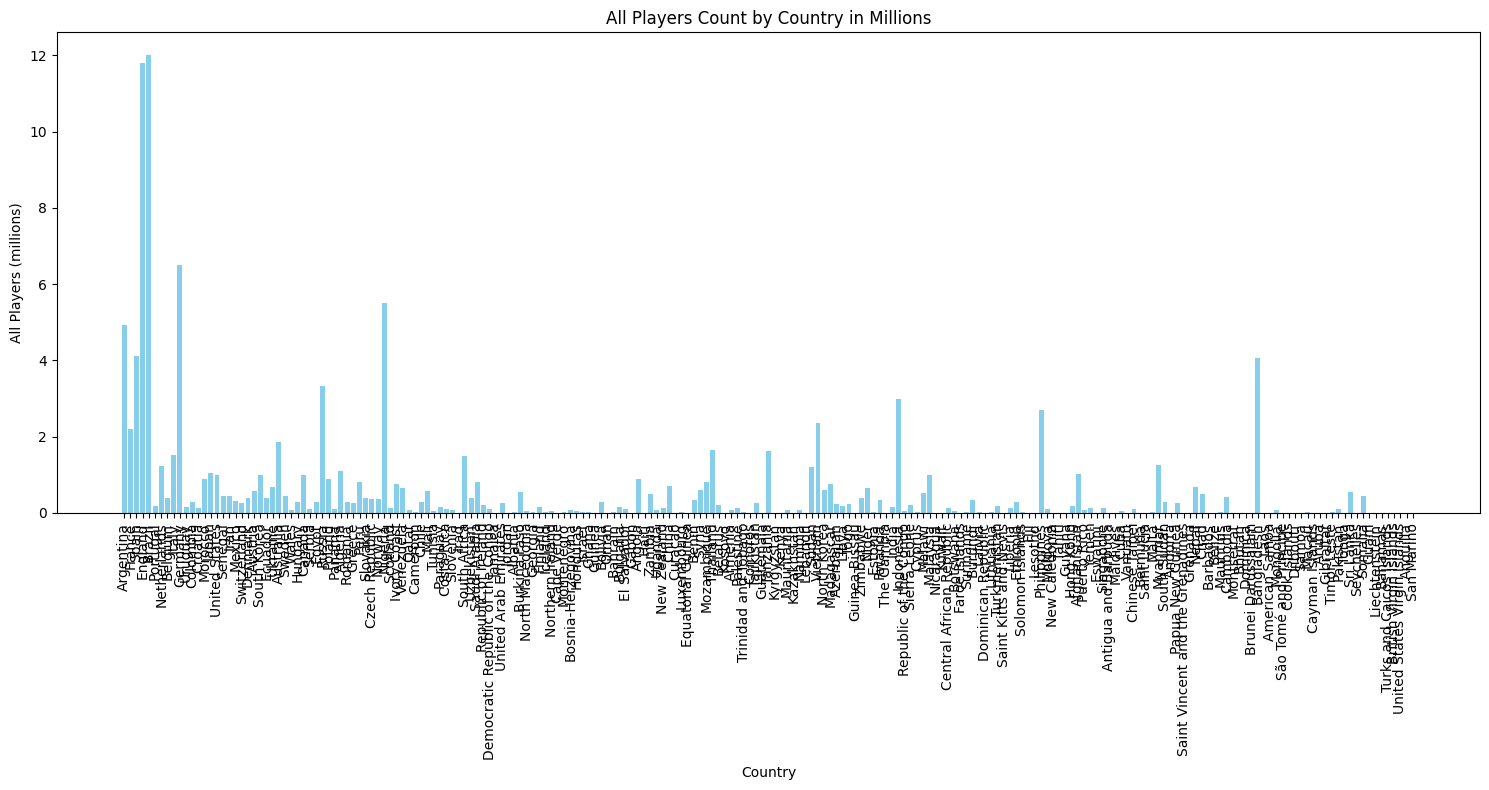

In [137]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_main_sorted = FIFA_main.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_main_sorted['All Players (millions)'] = FIFA_main_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))
plt.bar(FIFA_main_sorted['Nation'], FIFA_main_sorted['All Players (millions)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

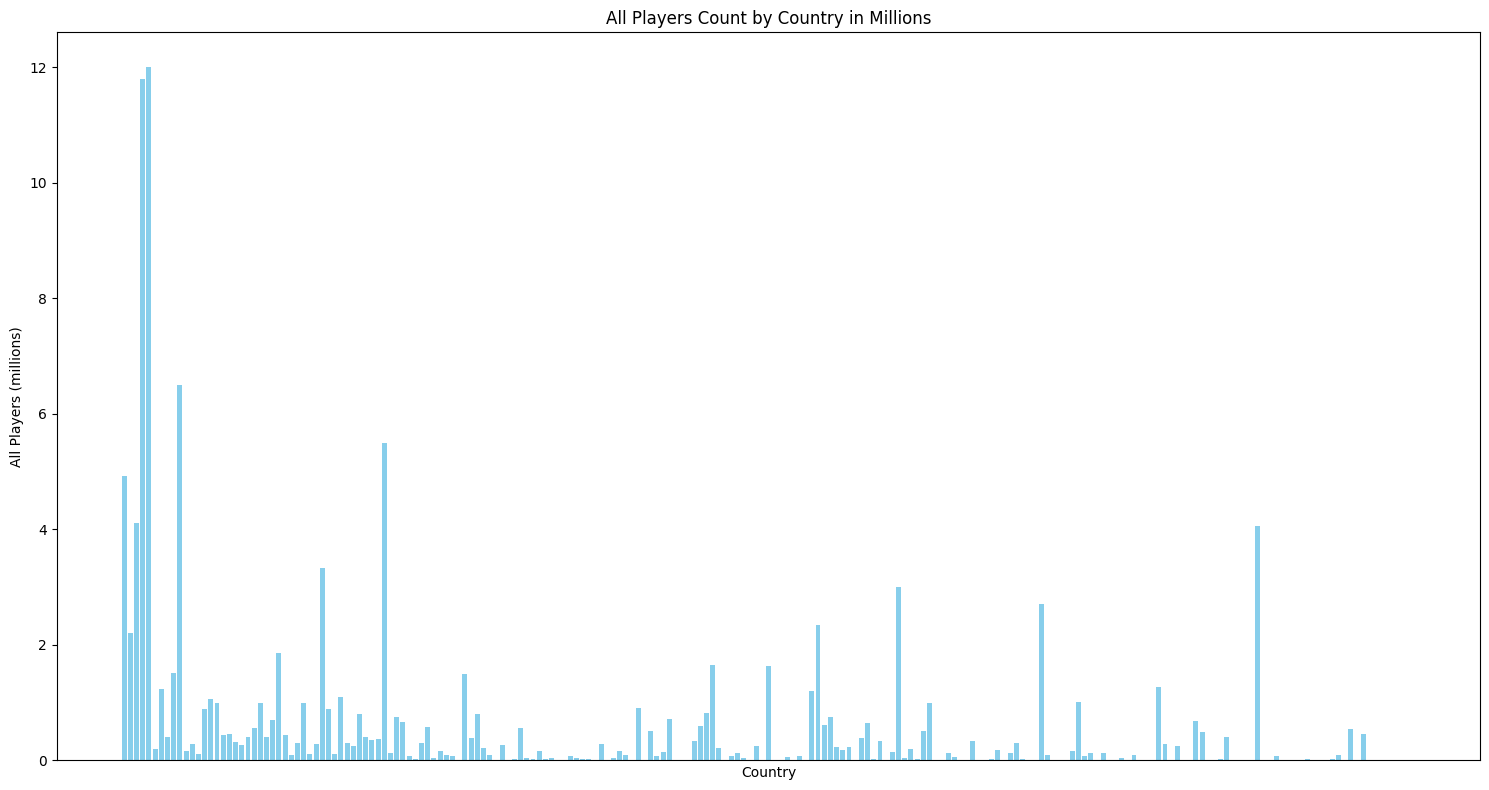

In [138]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_main_sorted = FIFA_main.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_main_sorted['All Players (millions)'] = FIFA_main_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))

# Create the bar plot
plt.bar(FIFA_main_sorted['Nation'], FIFA_main_sorted['All Players (millions)'], color='skyblue')

# Labeling the axes and title
plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')

# Remove the x-tick labels by setting them to an empty list
plt.xticks([])  # This hides the country names

# Alternatively, you can make the labels transparent instead of removing them completely:
# plt.xticks(alpha=0)  # Makes labels fully transparent

plt.tight_layout()
plt.show()


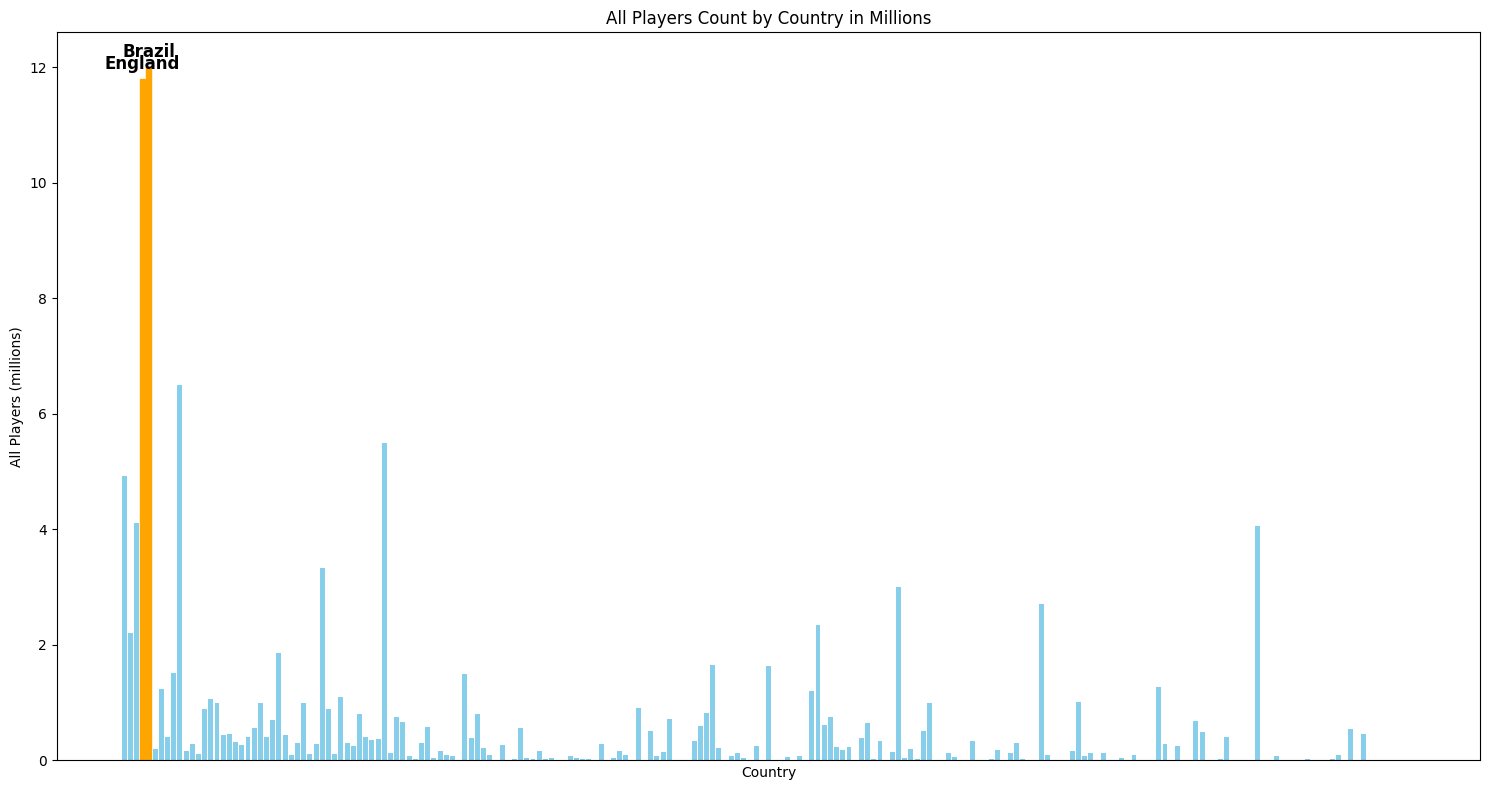

In [139]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_main_sorted = FIFA_main.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_main_sorted['All Players (millions)'] = FIFA_main_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))

# Create the bar plot
bars = plt.bar(FIFA_main_sorted['Nation'], FIFA_main_sorted['All Players (millions)'], color='skyblue')

# Labeling the axes and title
plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')

# Hide all country names initially
plt.xticks([])

# Highlight England and Brazil by customizing their appearance
highlight_countries = ['England', 'Brazil']
highlight_indices = FIFA_main_sorted[FIFA_main_sorted['Nation'].isin(highlight_countries)].index

for i in highlight_indices:
    bars[i].set_color('orange')  # Set a different color for the highlighted countries

    # Add custom label for highlighted countries
    plt.text(
        bars[i].get_x() + bars[i].get_width() / 2,  # X position of the text
        bars[i].get_height() + 0.1,  # Y position of the text (above the bar)
        FIFA_main_sorted['Nation'][i],  # Text label (country name)
        ha='center', va='bottom',  # Horizontal and vertical alignment
        fontweight='bold', color='black', fontsize=12  # Custom font style
    )

# Show the plot with all adjustments
plt.tight_layout()
plt.show()


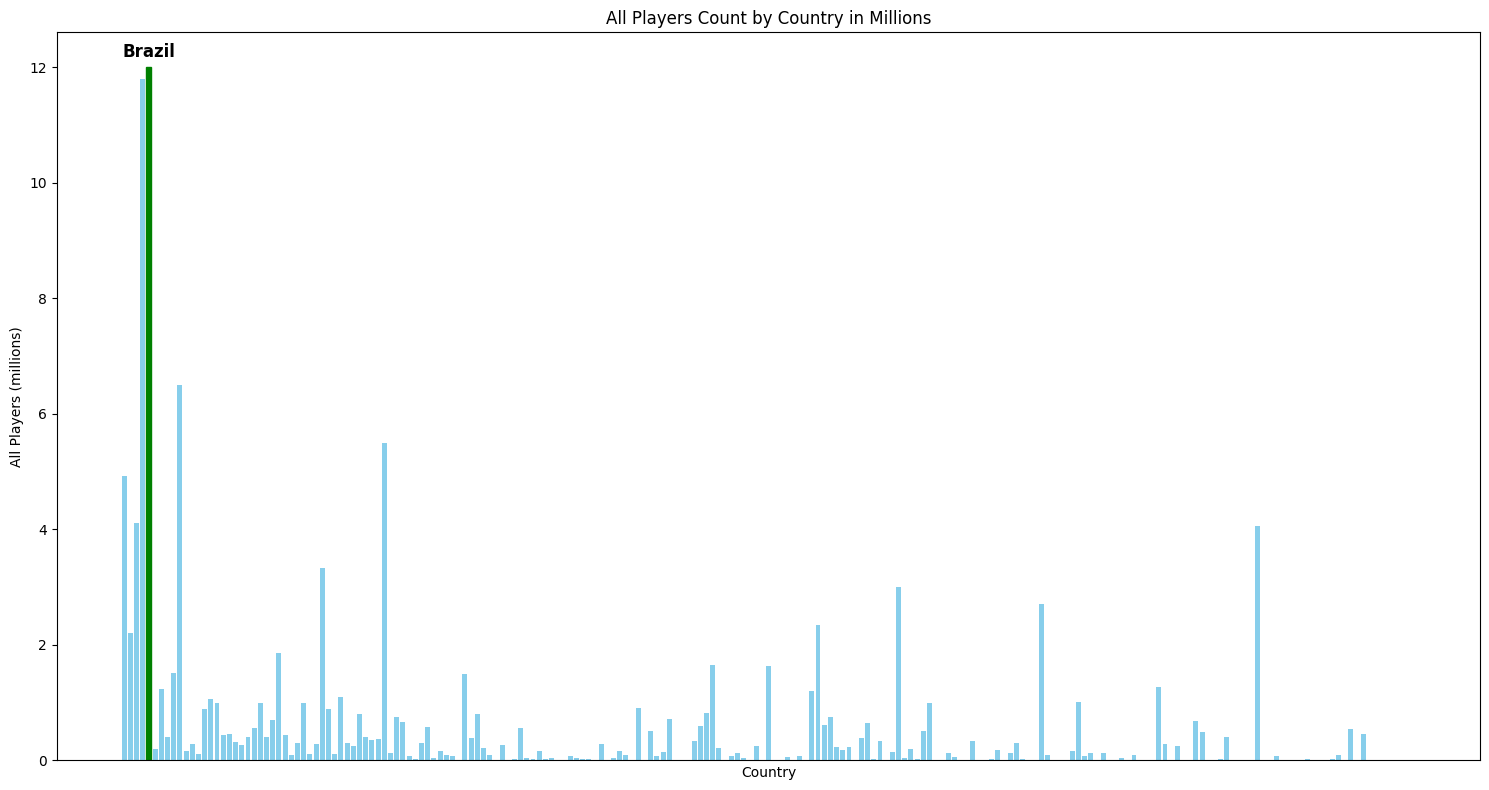

In [140]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_main_sorted = FIFA_main.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_main_sorted['All Players (millions)'] = FIFA_main_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))

# Create the bar plot
bars = plt.bar(FIFA_main_sorted['Nation'], FIFA_main_sorted['All Players (millions)'], color='skyblue')

# Labeling the axes and title
plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')

# Hide all country names initially
plt.xticks([])

# Highlight England and Brazil with different mild colors
highlight_countries = ['Brazil']
highlight_colors = {'Brazil': 'green'}

highlight_indices = FIFA_main_sorted[FIFA_main_sorted['Nation'].isin(highlight_countries)].index

for i in highlight_indices:
    country_name = FIFA_main_sorted['Nation'][i]
    bars[i].set_color(highlight_colors[country_name])  # Set mild color for the highlighted countries

    # Add custom label for highlighted countries
    plt.text(
        bars[i].get_x() + bars[i].get_width() / 2,  # X position of the text
        bars[i].get_height() + 0.1,  # Y position of the text (above the bar)
        country_name,  # Text label (country name)
        ha='center', va='bottom',  # Horizontal and vertical alignment
        fontweight='bold', color='black', fontsize=12  # Custom font style
    )

# Show the plot with all adjustments
plt.tight_layout()
plt.show()


In [141]:
FIFA_CONMEBOL['Player to Population Ratio (%)'] = (FIFA_CONMEBOL['All Players'] / FIFA_CONMEBOL['2024 Population']) * 100
FIFA_CONMEBOL['Player to Population Ratio (%)'] = FIFA_CONMEBOL['Player to Population Ratio (%)'].round(1)
mean_ratio_all_CONMEBOL = FIFA_CONMEBOL['Player to Population Ratio (%)'].mean()
FIFA_CONMEBOL['All Players'].fillna(mean_ratio_all_CONMEBOL * FIFA_CONMEBOL['2024 Population'] / 100, inplace=True)
FIFA_CONMEBOL['All Players'] = FIFA_CONMEBOL['All Players'].astype(int)

FIFA_CONMEBOL['Pro to All ratio (%)'] = (FIFA_CONMEBOL['Pro Players'] / FIFA_CONMEBOL['All Players']) * 100
FIFA_CONMEBOL['Pro to All ratio (%)'] = FIFA_CONMEBOL['Pro to All ratio (%)'].round(1)
mean_ratio_PRO_CONMEBOL = FIFA_CONMEBOL['Pro to All ratio (%)'].mean()
FIFA_CONMEBOL['Pro Players'].fillna(mean_ratio_PRO_CONMEBOL * FIFA_CONMEBOL['All Players'] / 100, inplace=True)
FIFA_CONMEBOL['Pro Players'] = FIFA_CONMEBOL['Pro Players'].astype(int)
FIFA_CONMEBOL
FIFA_CONMEBOL['Player to Population Ratio (%)'] = FIFA_CONMEBOL['Player to Population Ratio (%)'].fillna(FIFA_CONMEBOL['Player to Population Ratio (%)'].mean()).round(1)
FIFA_CONMEBOL['Pro to All ratio (%)'] = FIFA_CONMEBOL['Pro to All ratio (%)'].fillna(FIFA_CONMEBOL['Pro to All ratio (%)'].mean()).round(1)




C:\Users\modri\AppData\Local\Temp\ipykernel_6644\3080590386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_CONMEBOL['Player to Population Ratio (%)'] = (FIFA_CONMEBOL['All Players'] / FIFA_CONMEBOL['2024 Population']) * 100
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\3080590386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FIFA_CONMEBOL['Player to Population Ratio (%)'] = FIFA_CONMEBOL['Player to Population Ratio (%)'].round(1)
C:\Users\modri\AppData\Local\Temp\ipykernel_6644\3080590386

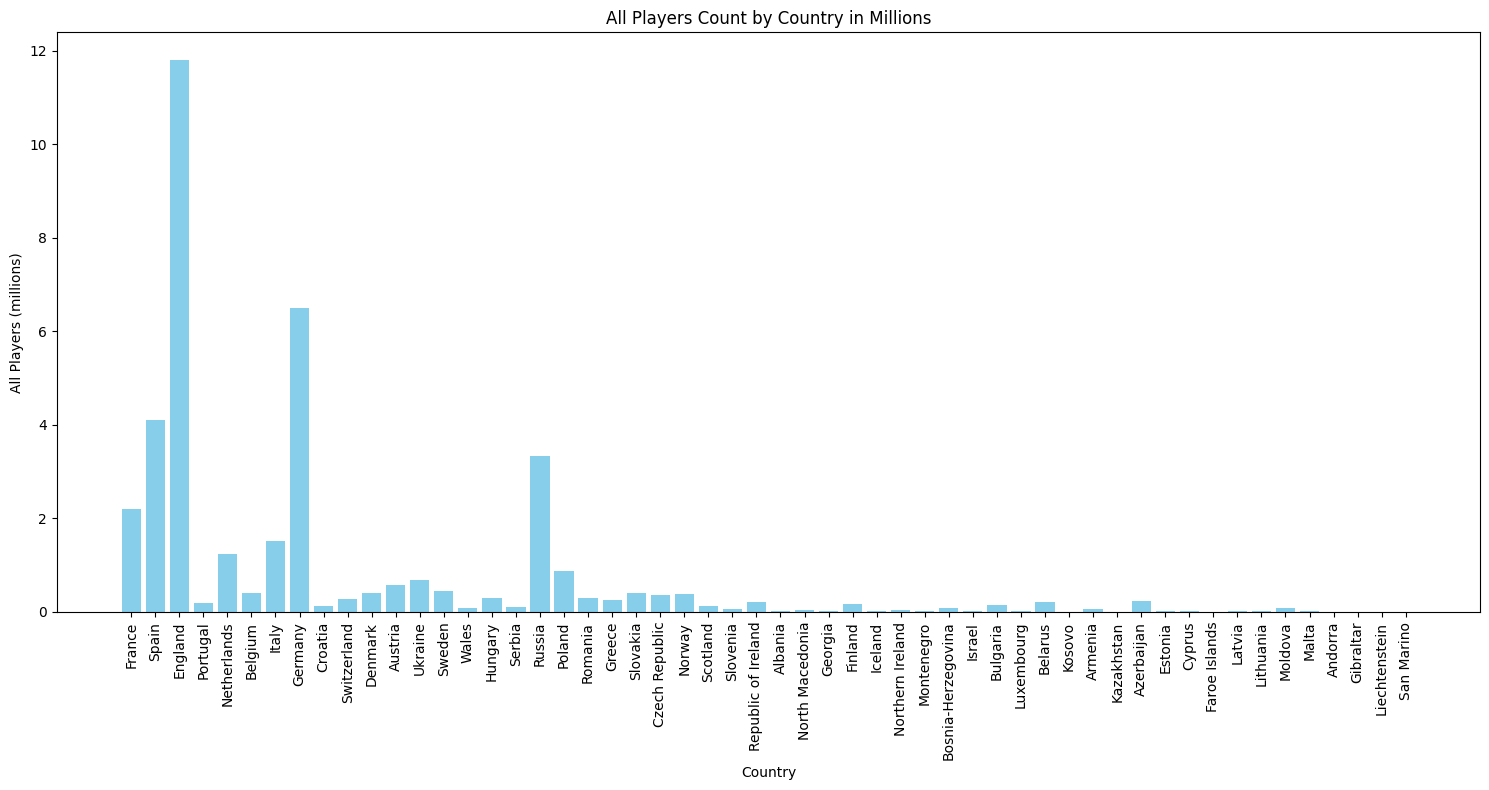

In [142]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_UEFA_sorted = FIFA_UEFA.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_UEFA_sorted['All Players (millions)'] = FIFA_UEFA_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))
plt.bar(FIFA_UEFA_sorted['Nation'], FIFA_UEFA_sorted['All Players (millions)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

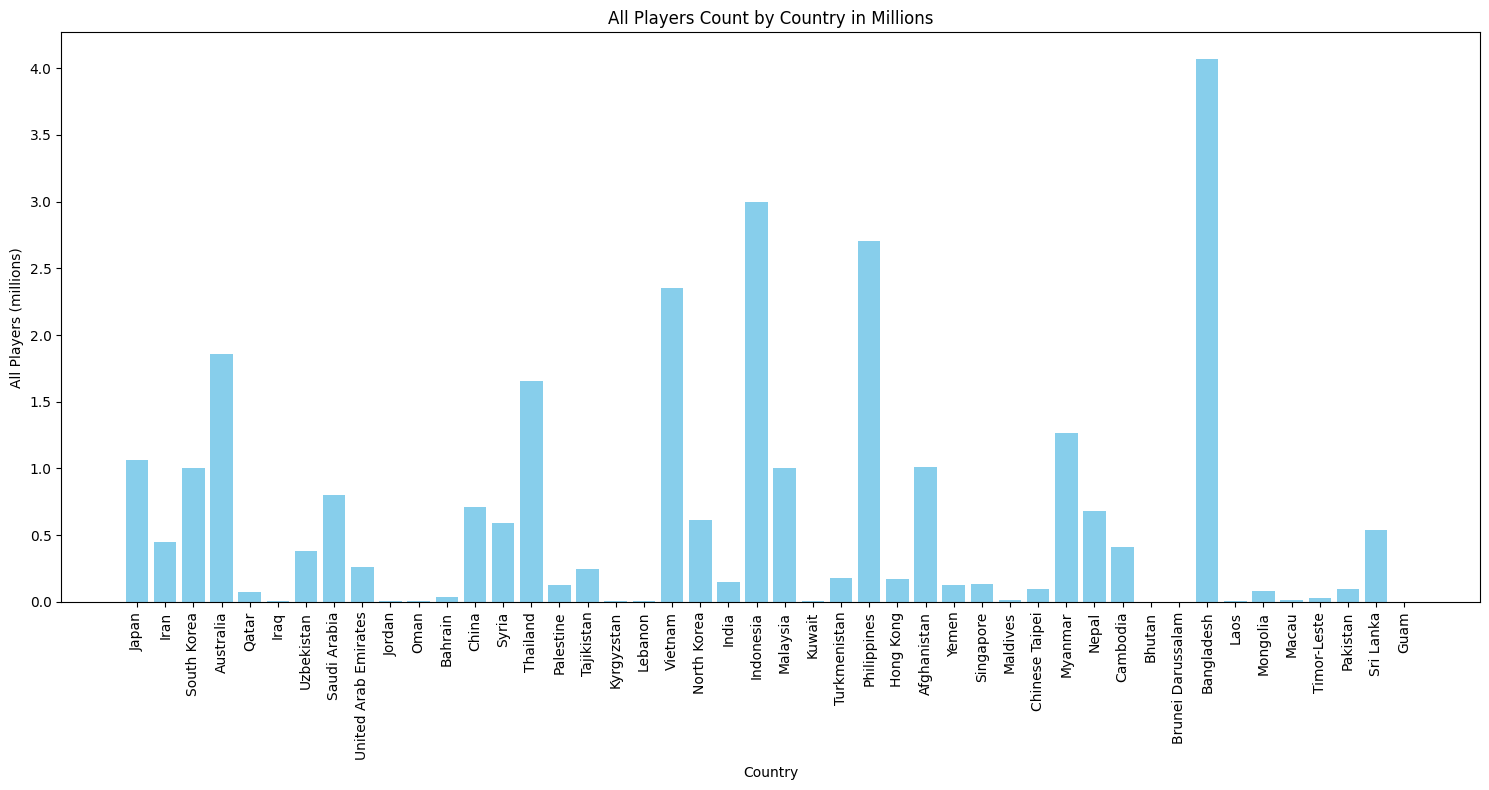

In [143]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_AFC_sorted = FIFA_AFC.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_AFC_sorted['All Players (millions)'] = FIFA_AFC_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))
plt.bar(FIFA_AFC_sorted['Nation'], FIFA_AFC_sorted['All Players (millions)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

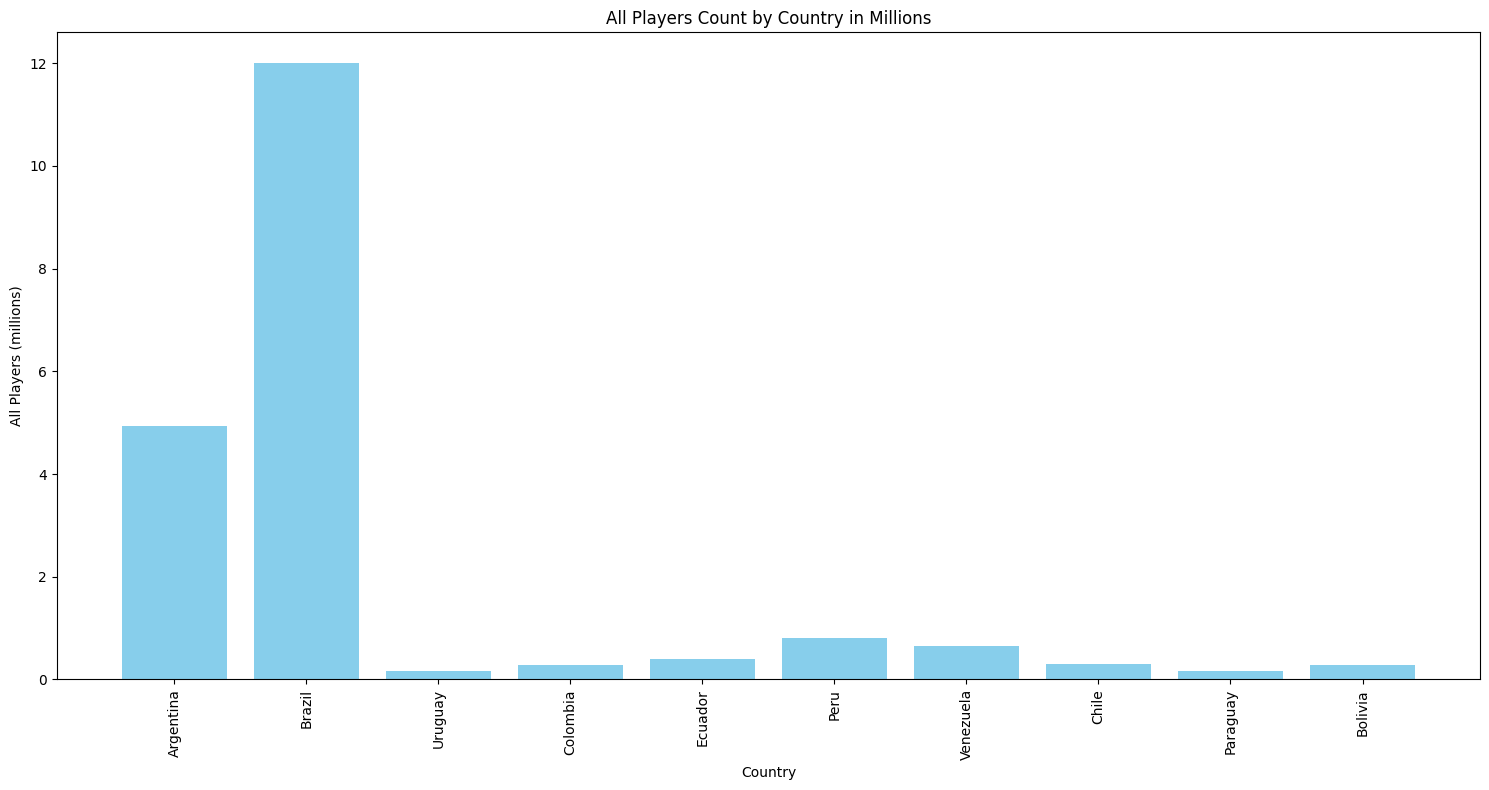

In [144]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_CONMEBOL_sorted = FIFA_CONMEBOL.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_CONMEBOL_sorted['All Players (millions)'] = FIFA_CONMEBOL_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))
plt.bar(FIFA_CONMEBOL_sorted['Nation'], FIFA_CONMEBOL_sorted['All Players (millions)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

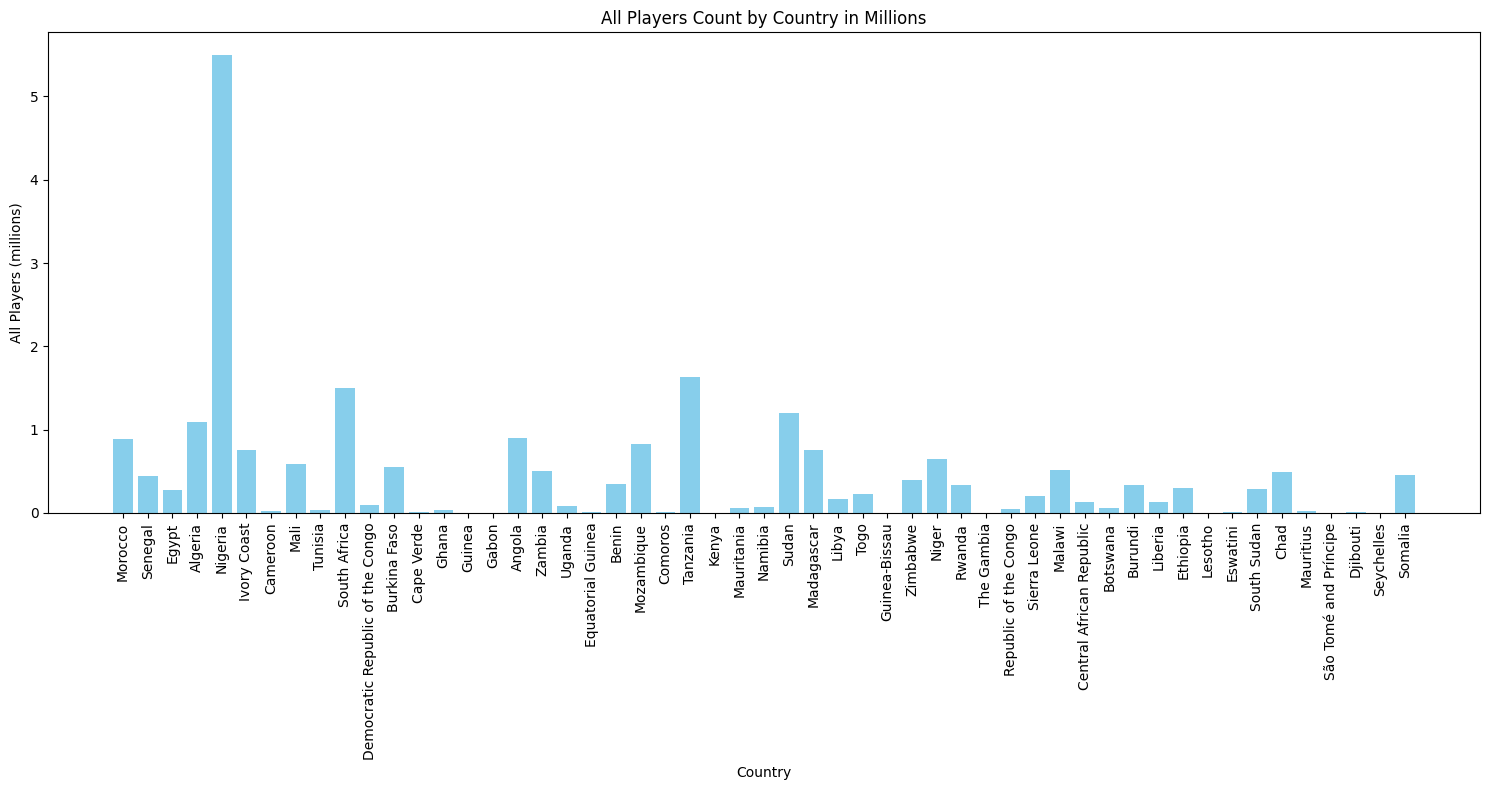

In [145]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_CAF_sorted = FIFA_CAF.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_CAF_sorted['All Players (millions)'] = FIFA_CAF_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))
plt.bar(FIFA_CAF_sorted['Nation'], FIFA_CAF_sorted['All Players (millions)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

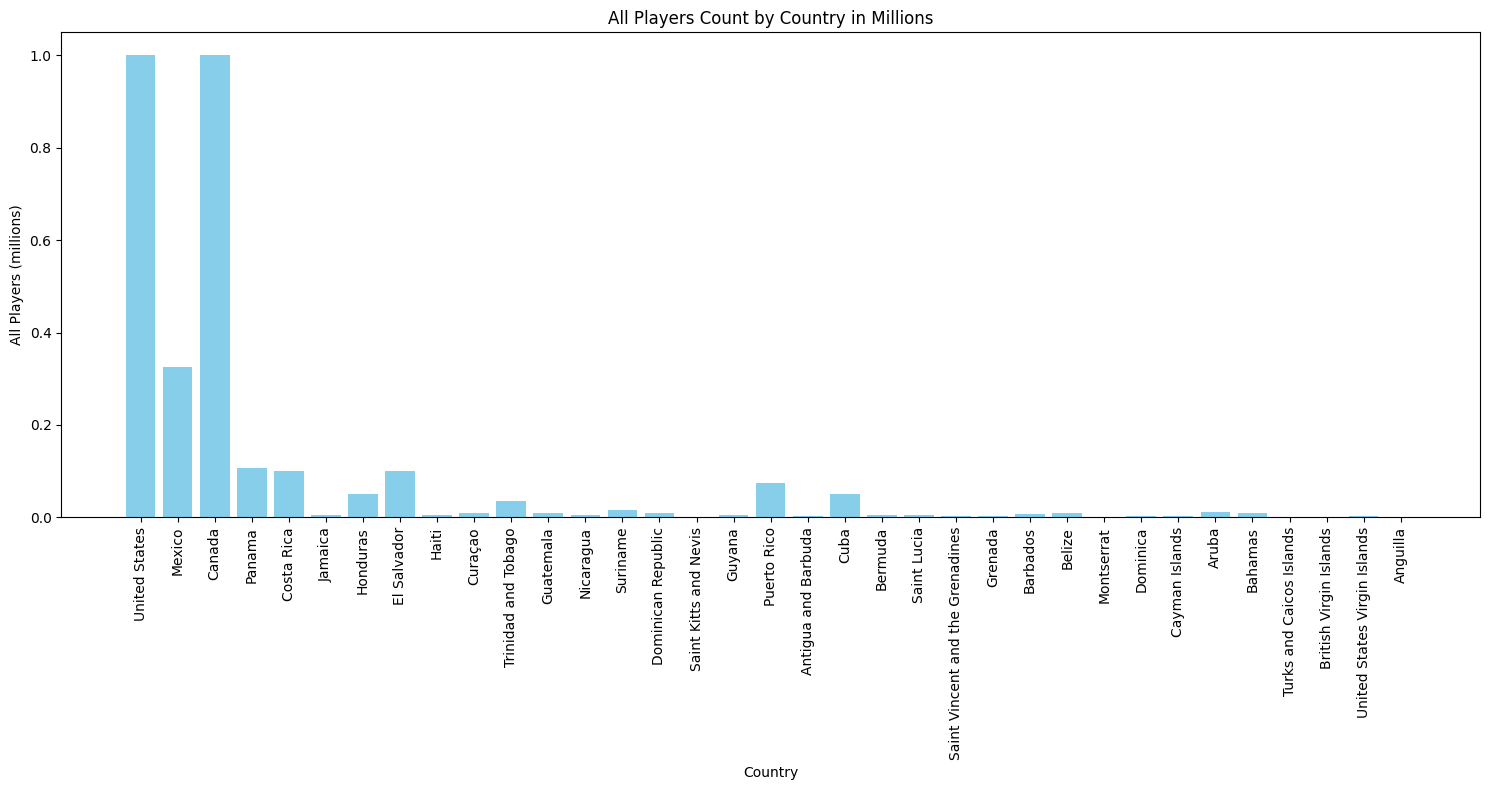

In [146]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_CONCACAF_sorted = FIFA_CONCACAF.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_CONCACAF_sorted['All Players (millions)'] = FIFA_CONCACAF_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))
plt.bar(FIFA_CONCACAF_sorted['Nation'], FIFA_CONCACAF_sorted['All Players (millions)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

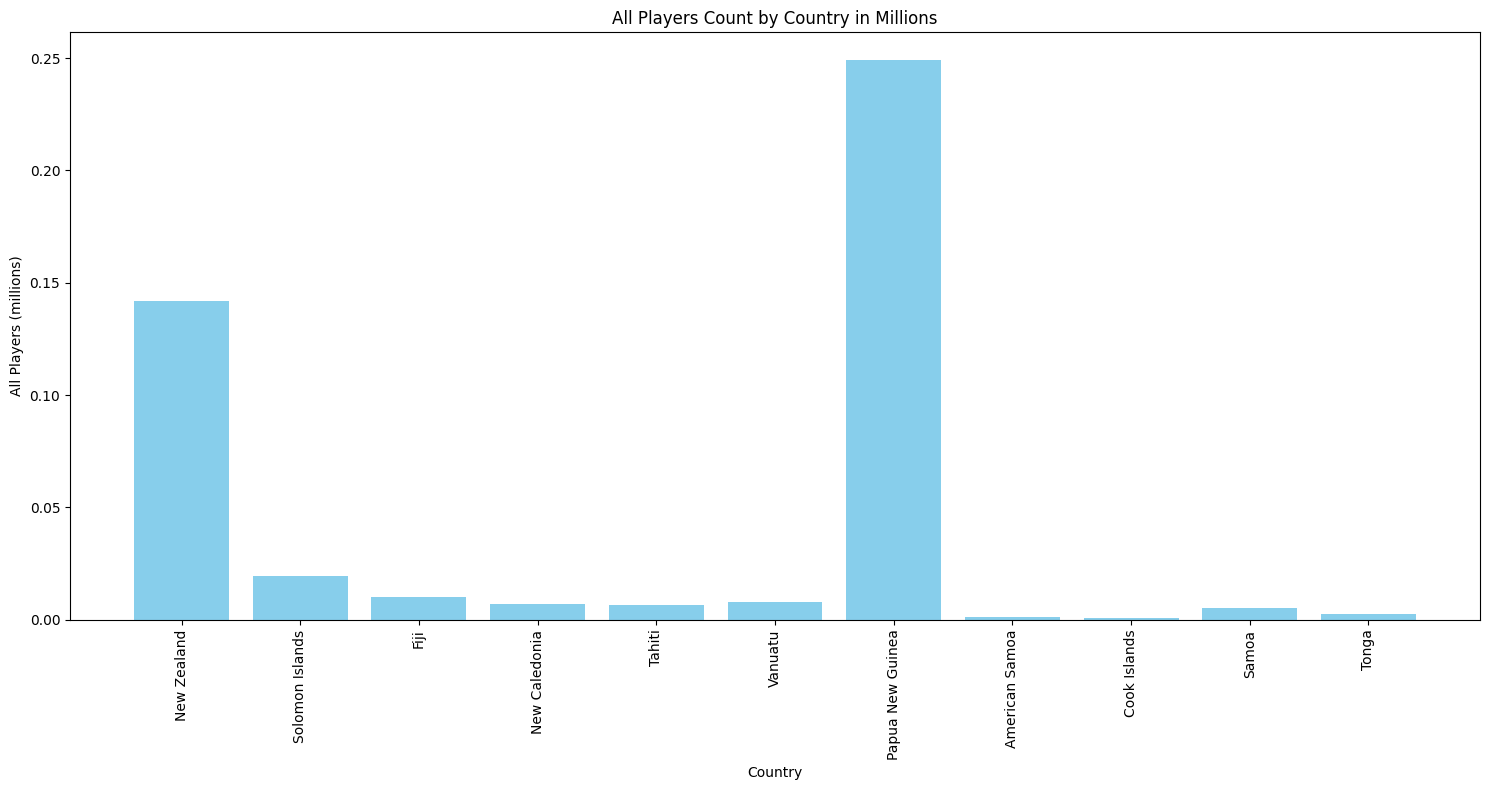

In [147]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_OFC_sorted = FIFA_OFC.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_OFC_sorted['All Players (millions)'] = FIFA_OFC_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))
plt.bar(FIFA_OFC_sorted['Nation'], FIFA_OFC_sorted['All Players (millions)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [148]:
import pandas as pd

# Import the pandas library

# Read the FIFA-Filtered.xlsx file into a DataFrame
fifa_filtered_df = pd.read_excel('FIFA-Filtered.xlsx')


In [149]:
combined_filtered = pd.concat([transfer_market_25, fifa_filtered_df], axis=1)
# Combine the two data frames on the 'Nation' column
combined_filtered = pd.merge(fifa_filtered_df, transfer_market_25, on='Nation', how='inner')
combined_filtered = combined_filtered.sort_values(by='Rank')
FIFA_KNOWN = pd.merge(combined_filtered, result_df, on='Nation', how='inner')
FIFA_KNOWN



,Nation,All Players,Rank,Confederation,Points,2024 Population
0,Argentina,4928574,1,CONMEBOL,1867,45851400
1,France,2200000,2,UEFA,1860,66650800
2,Spain,4107300,3,UEFA,1853,47890000
3,England,11800000,4,UEFA,1814,56000000
4,Brazil,12000000,5,CONMEBOL,1776,212812000
...,...,...,...,...,...,...
100,Djibouti,10000,191,CAF,877,1184080
101,Aruba,10700,195,CONCACAF,858,108147
102,Gibraltar,2000,196,UEFA,849,40126
103,Pakistan,100000,198,AFC,843,255220000


In [150]:
# create player to population ratio
FIFA_KNOWN['Player to Population Ratio (%)'] = (FIFA_KNOWN['All Players'] / FIFA_KNOWN['2024 Population']) * 100
FIFA_KNOWN['Player to Population Ratio (%)'] = FIFA_KNOWN['Player to Population Ratio (%)'].round(1)
mean_ratio_all_KNOWN = FIFA_KNOWN['Player to Population Ratio (%)'].mean()
FIFA_KNOWN['All Players'] = FIFA_KNOWN['All Players'].astype(int)




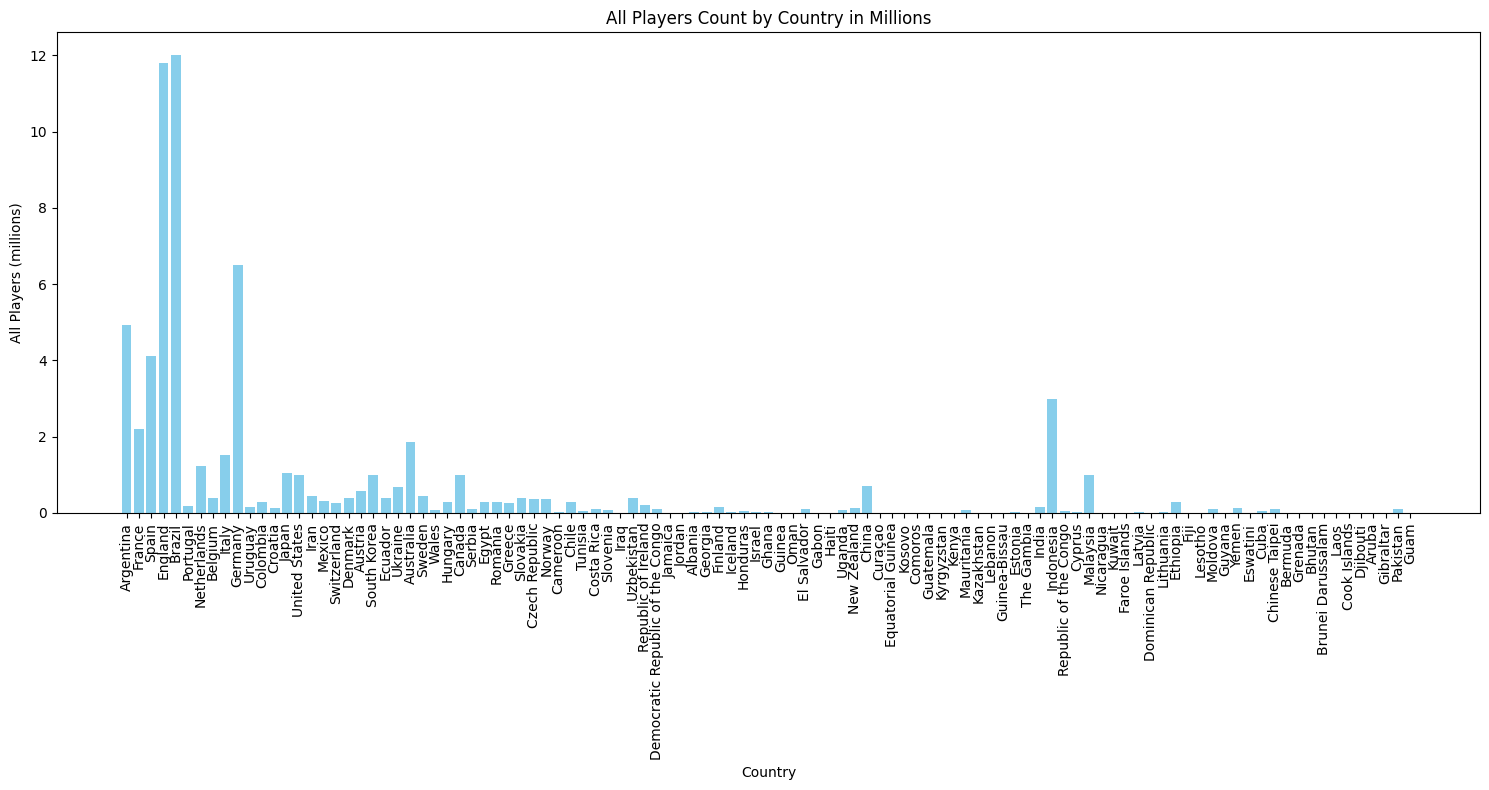

In [151]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_KNOWN_sorted = FIFA_KNOWN.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_KNOWN_sorted['All Players (millions)'] = FIFA_KNOWN_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))
plt.bar(FIFA_KNOWN_sorted['Nation'], FIFA_KNOWN_sorted['All Players (millions)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

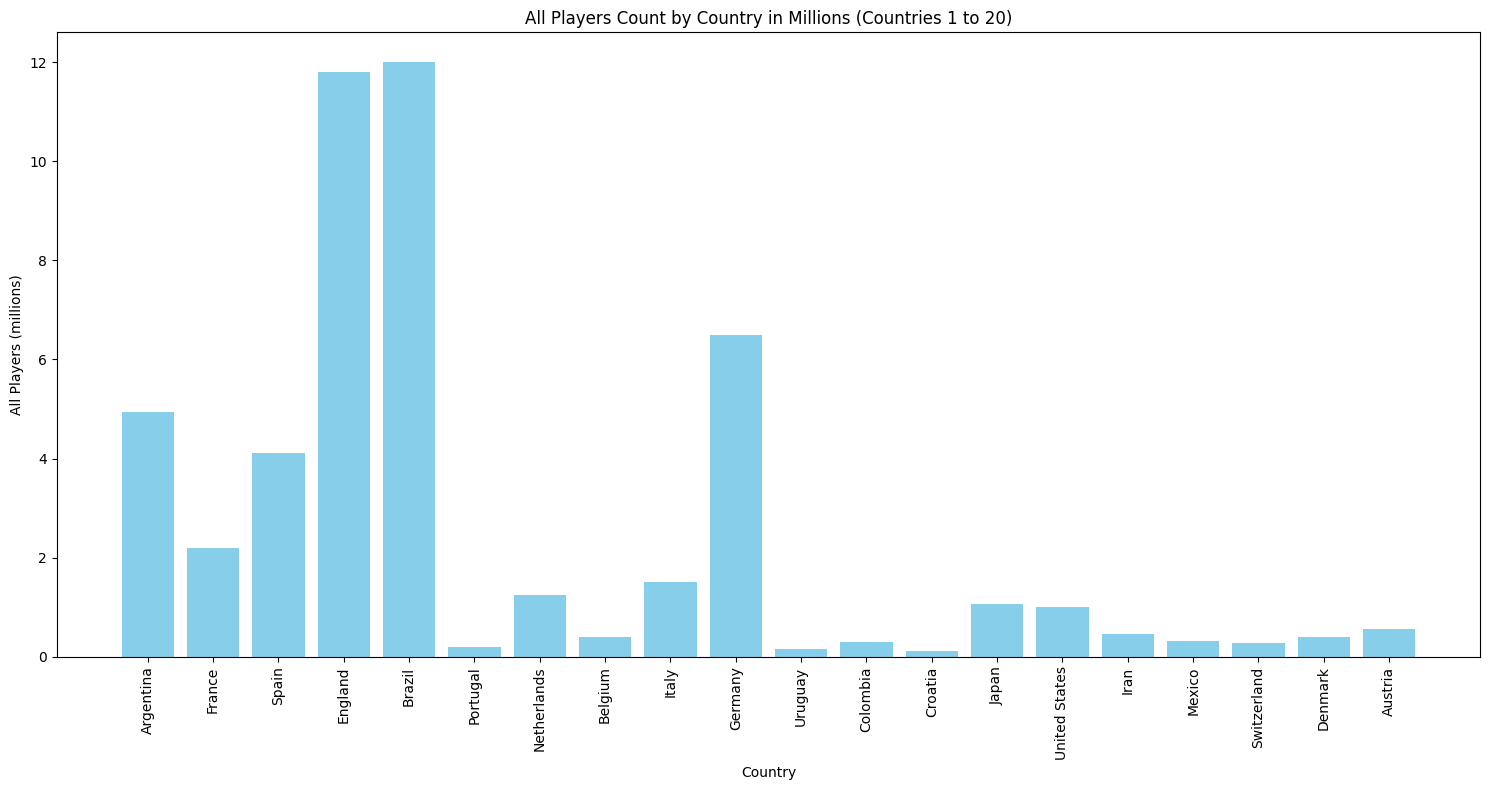

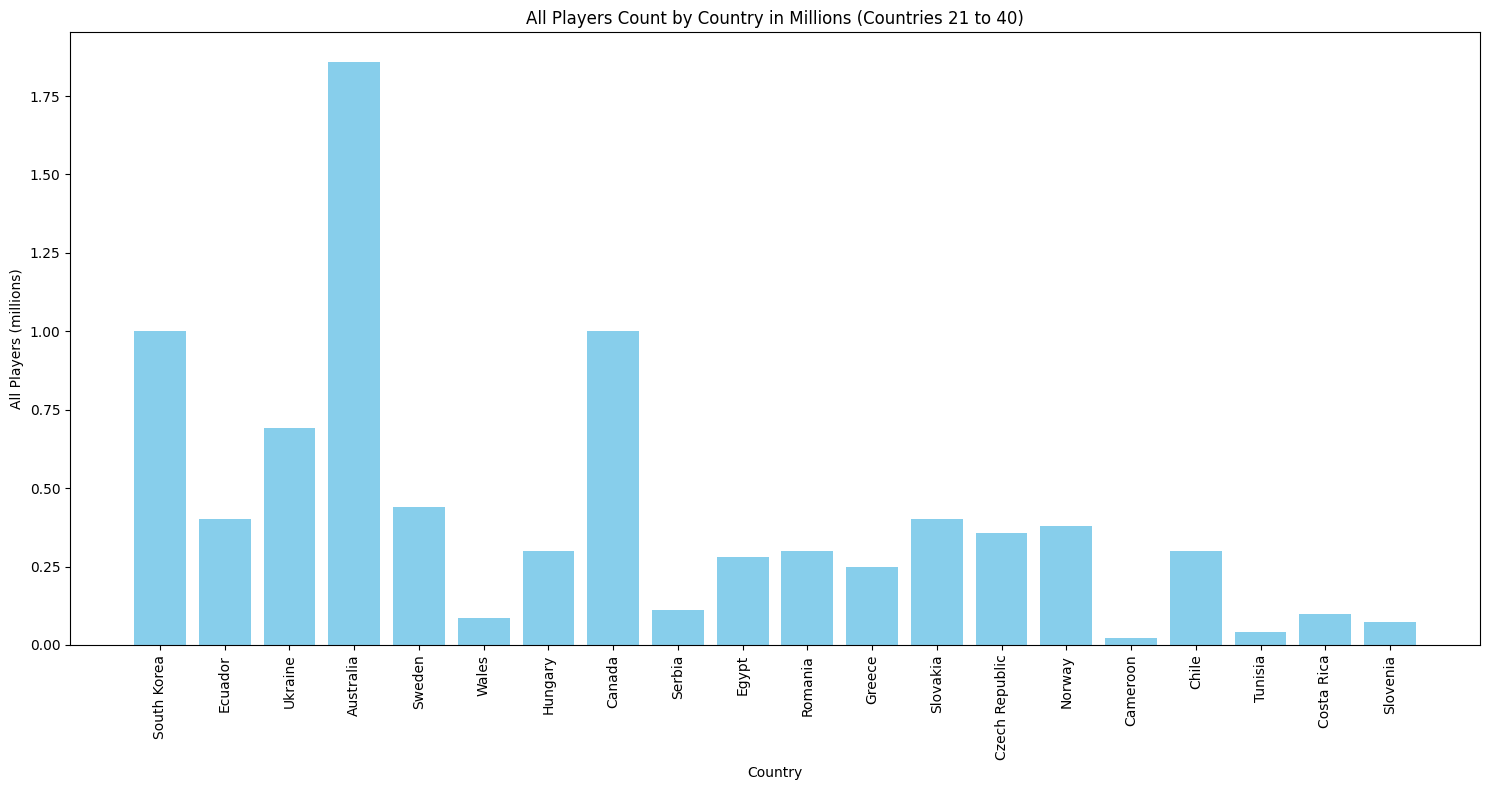

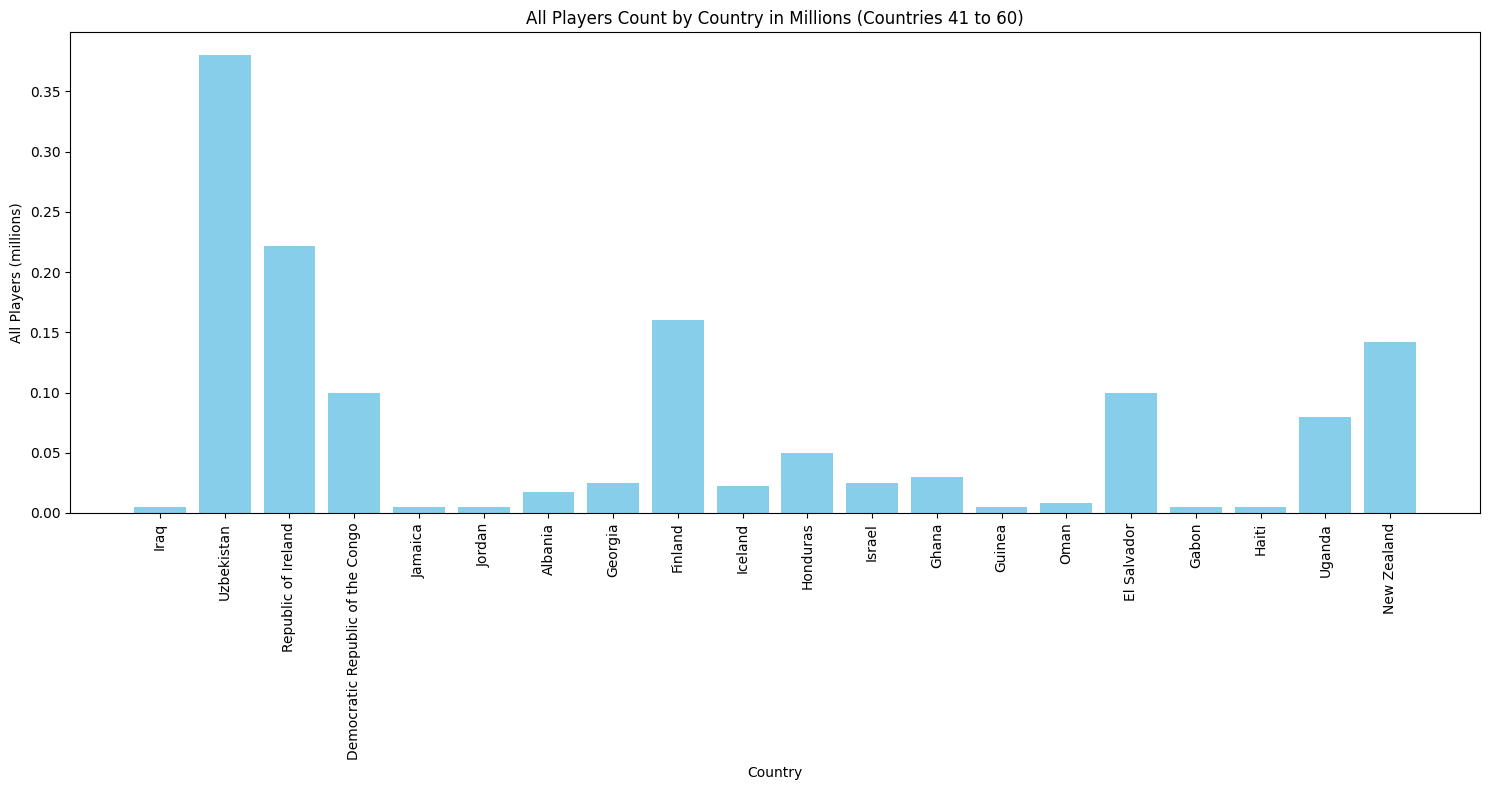

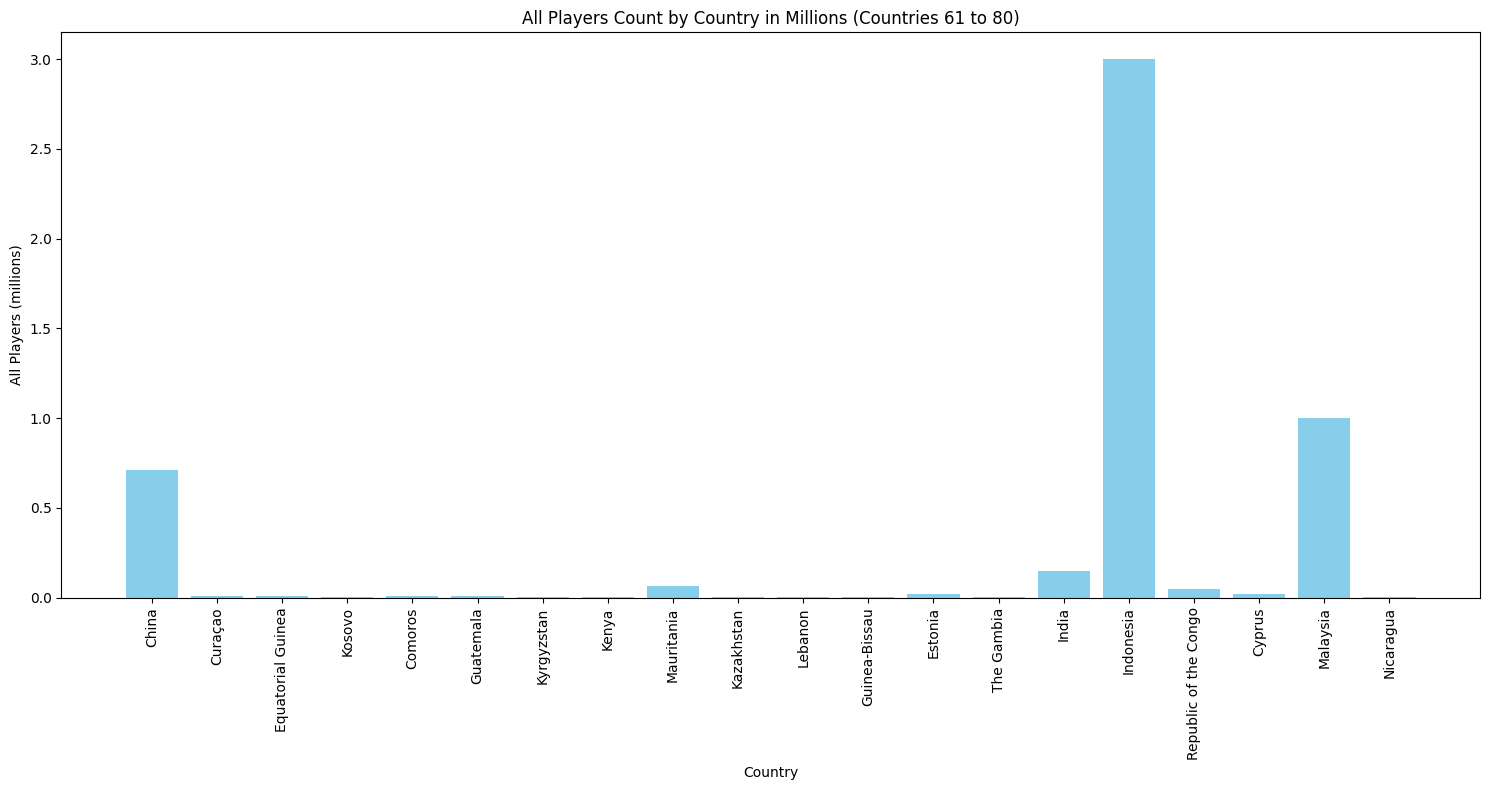

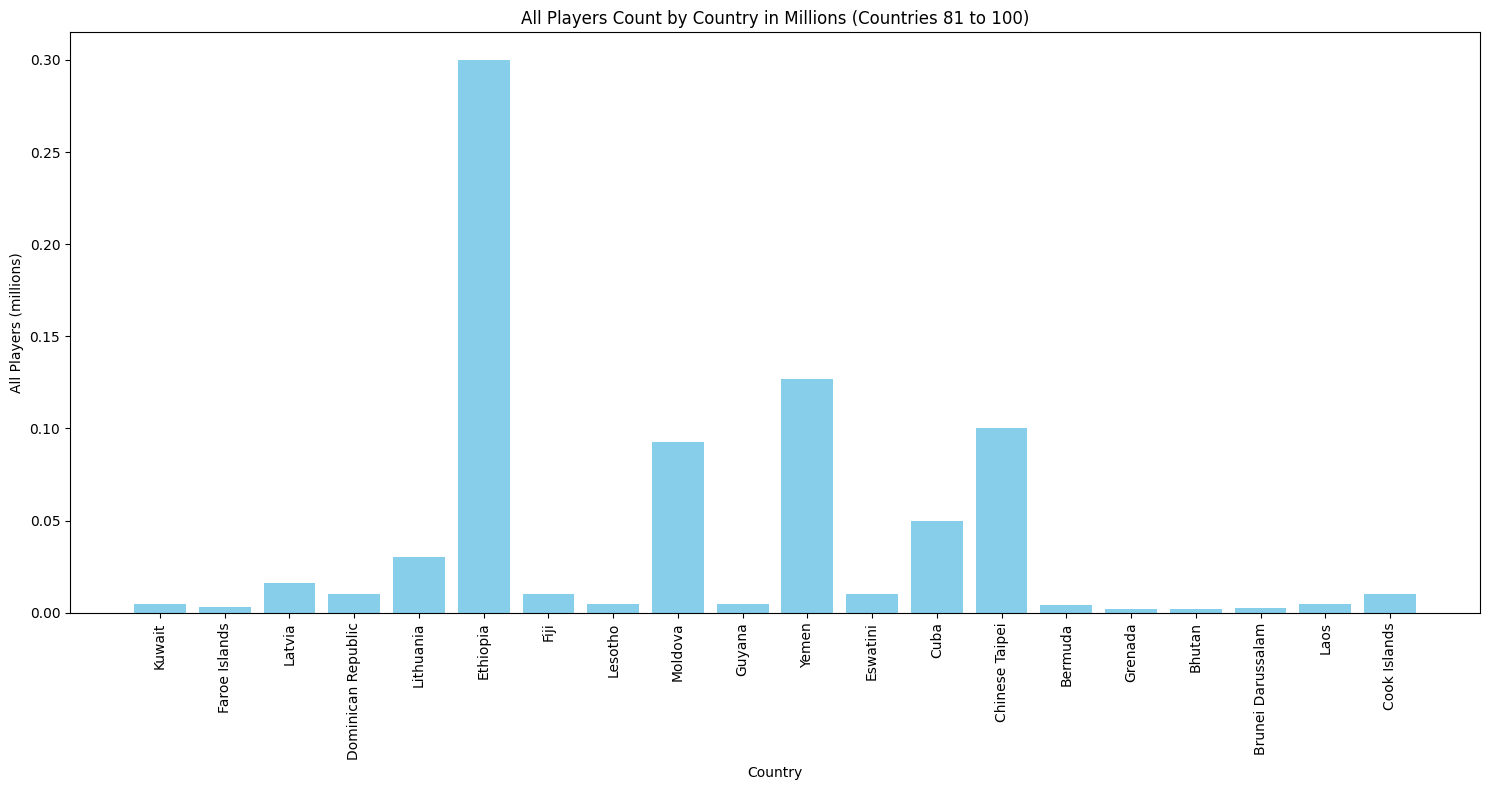

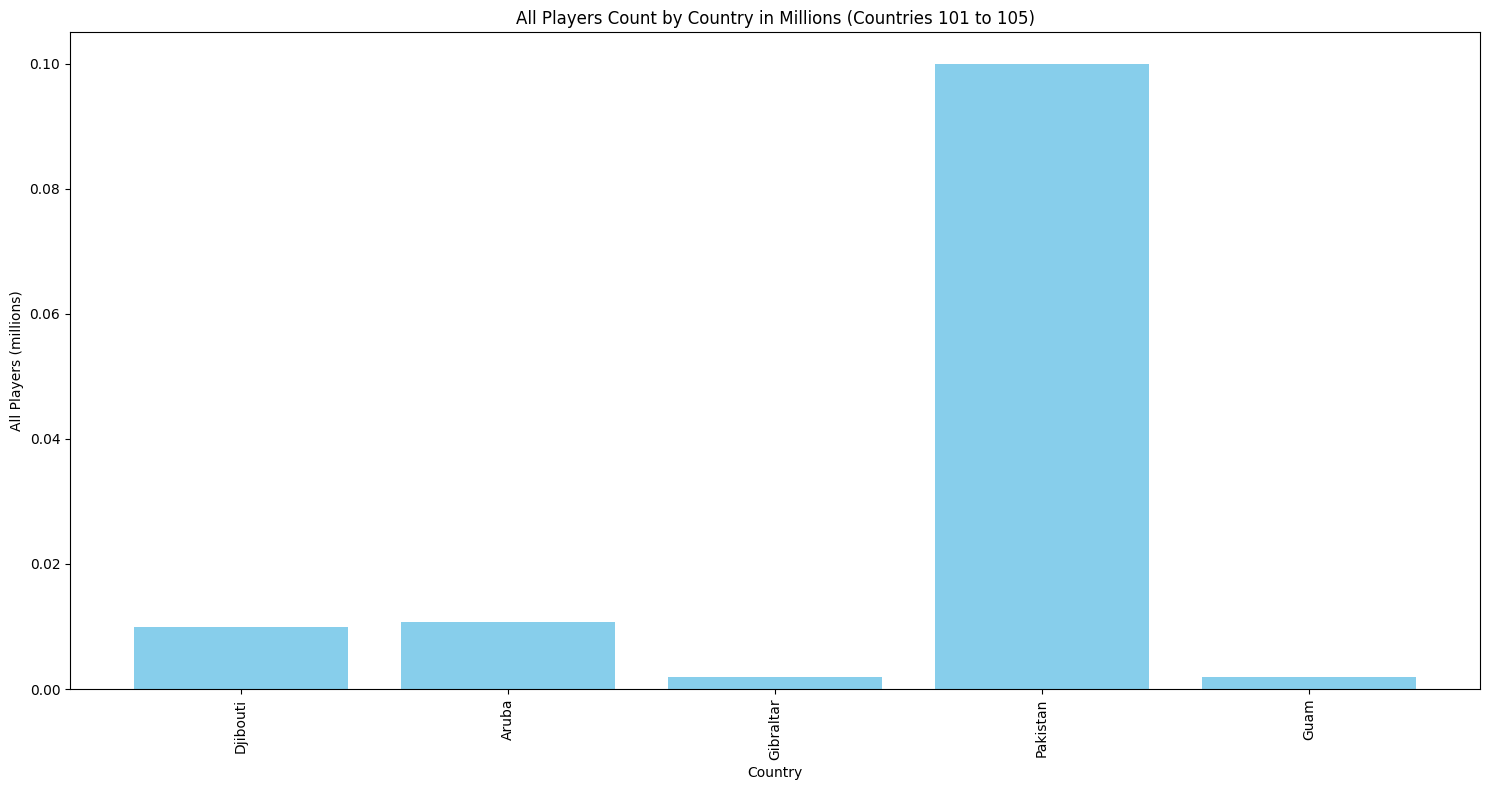

In [152]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_KNOWN_sorted = FIFA_KNOWN.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_KNOWN_sorted['All Players (millions)'] = FIFA_KNOWN_sorted['All Players'] / 1e6

# Define the number of countries per plot
countries_per_plot = 20

# Calculate the number of plots needed
num_plots = (len(FIFA_KNOWN_sorted) + countries_per_plot - 1) // countries_per_plot

# Plot the data in multiple plots
for i in range(num_plots):
    start_idx = i * countries_per_plot
    end_idx = min((i + 1) * countries_per_plot, len(FIFA_KNOWN_sorted))
    subset = FIFA_KNOWN_sorted.iloc[start_idx:end_idx]
    
    plt.figure(figsize=(15, 8))
    plt.bar(subset['Nation'], subset['All Players (millions)'], color='skyblue')
    plt.xlabel('Country')
    plt.ylabel('All Players (millions)')
    plt.title(f'All Players Count by Country in Millions (Countries {start_idx + 1} to {end_idx})')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

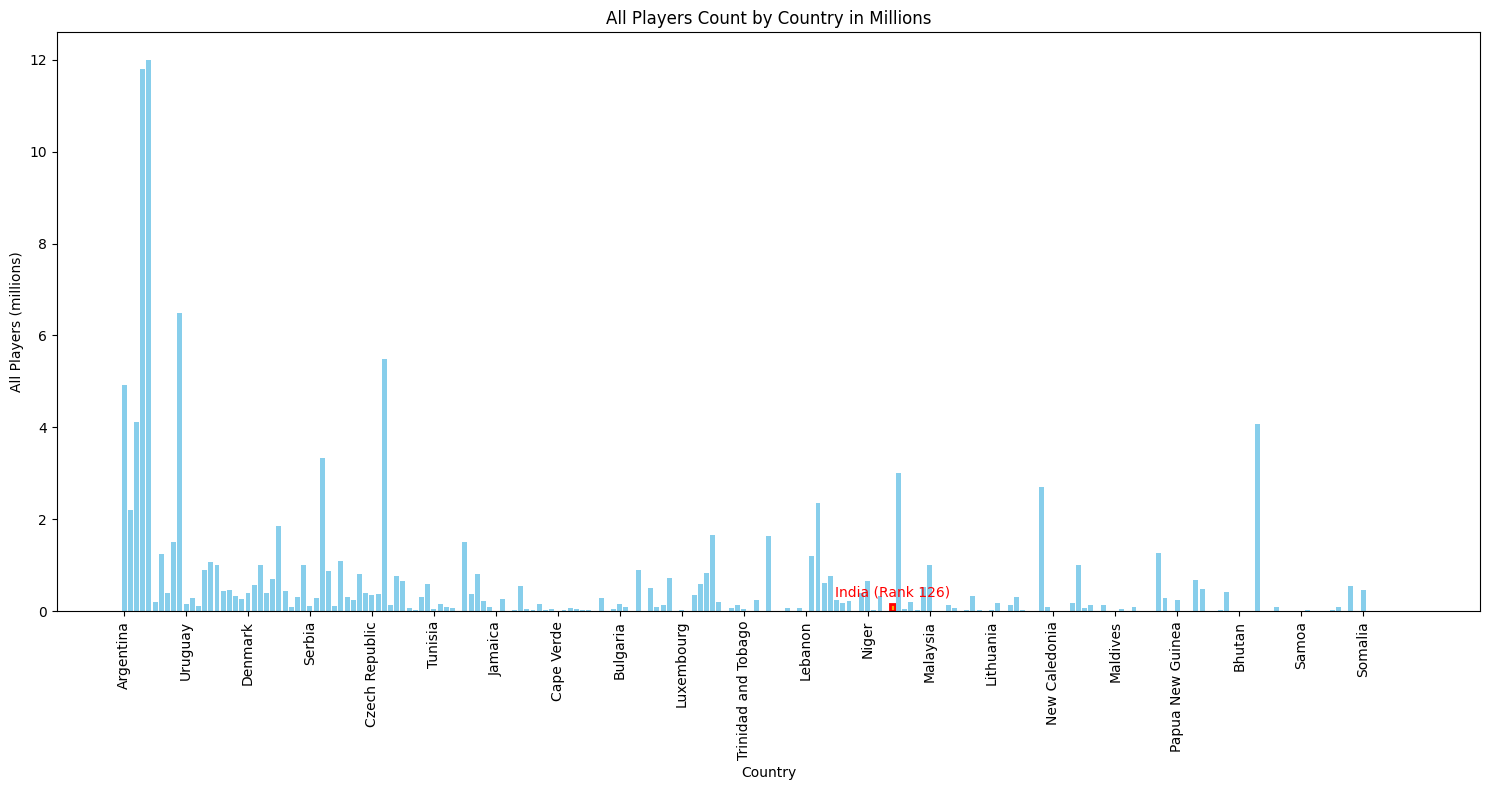

In [153]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank
FIFA_main_sorted = FIFA_main.sort_values(by='Rank')

# Create a new column for All Players in millions
FIFA_main_sorted['All Players (millions)'] = FIFA_main_sorted['All Players'] / 1e6

# Plot the data
plt.figure(figsize=(15, 8))
bars = plt.bar(FIFA_main_sorted['Nation'], FIFA_main_sorted['All Players (millions)'], color='skyblue')

# Highlight India
india_index = FIFA_main_sorted[FIFA_main_sorted['Nation'] == 'India'].index[0]
bars[india_index].set_color('orange')
bars[india_index].set_edgecolor('red')
bars[india_index].set_linewidth(2)

# Annotate India's ranking position
india_rank = FIFA_main_sorted.loc[india_index, 'Rank']
plt.text(india_index, FIFA_main_sorted.loc[india_index, 'All Players (millions)'] + 0.1, f'India (Rank {india_rank})', ha='center', va='bottom', color='red', fontsize=10)

# Set x-tick positions for every 10th country (0-indexed, so we want 0, 9, 19, etc.)
tick_positions = range(0, len(FIFA_main_sorted), 10)

# Set the x-tick labels to display only every 10th country's name
plt.xticks(tick_positions, [FIFA_main_sorted['Nation'].iloc[i] for i in tick_positions])

plt.xlabel('Country')
plt.ylabel('All Players (millions)')
plt.title('All Players Count by Country in Millions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


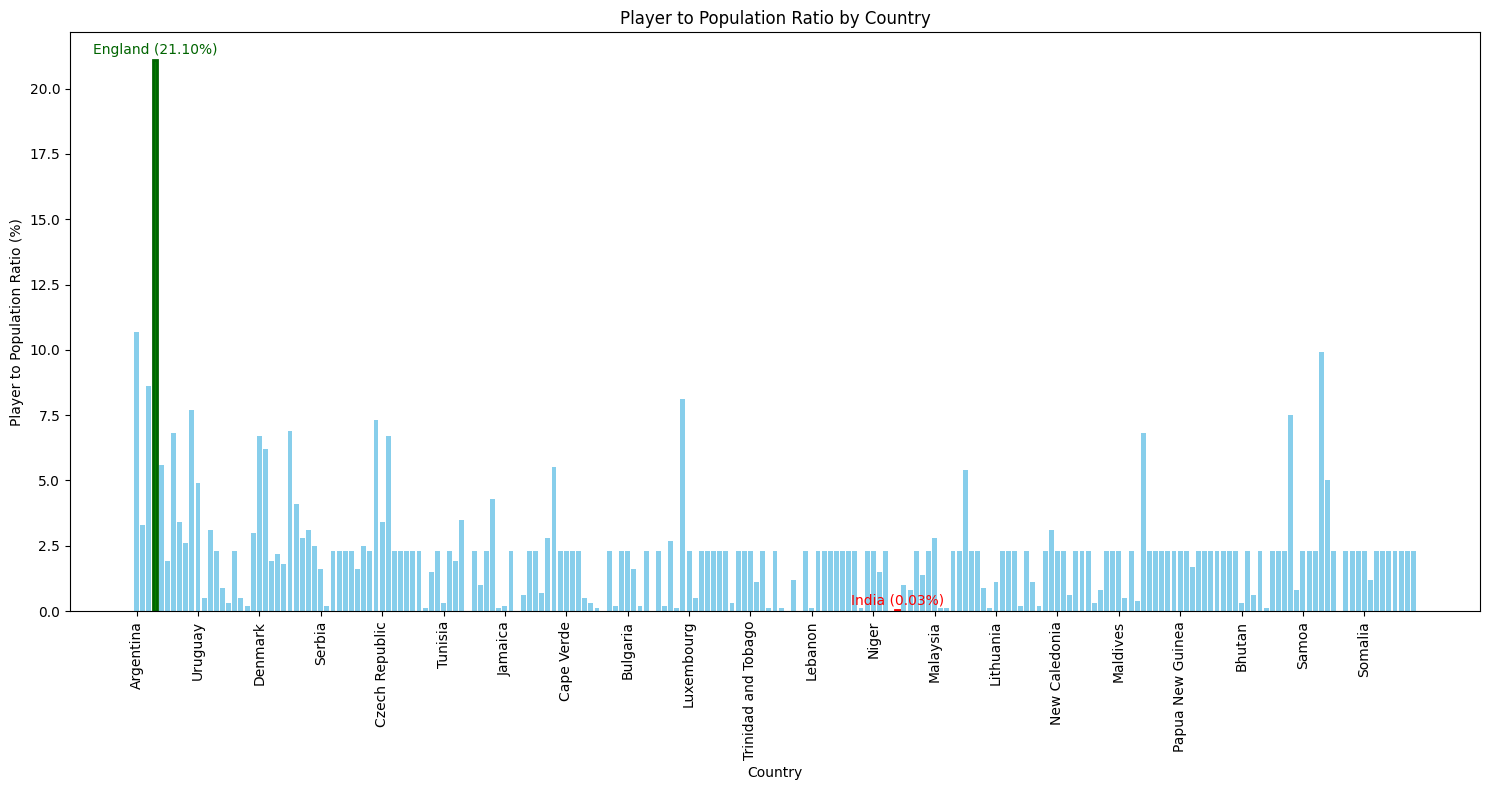

In [154]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Rank and reset index
FIFA_main_sorted = FIFA_main.sort_values(by='Rank').reset_index(drop=True)

# Override India's percentage value to 0.03%
if 'India' in FIFA_main_sorted['Nation'].values:
    india_index = FIFA_main_sorted[FIFA_main_sorted['Nation'] == 'India'].index[0]
    FIFA_main_sorted.at[india_index, 'Player to Population Ratio (%)'] = 0.03  # Set to 0.03%

# Plot the data
plt.figure(figsize=(15, 8))
bars = plt.bar(FIFA_main_sorted['Nation'], FIFA_main_sorted['Player to Population Ratio (%)'], color='skyblue')

# Function to highlight a country
def highlight_country(country, color, edgecolor):
    if country in FIFA_main_sorted['Nation'].values:
        country_index = FIFA_main_sorted[FIFA_main_sorted['Nation'] == country].index[0]
        bars[country_index].set_color(color)
        bars[country_index].set_edgecolor(edgecolor)
        bars[country_index].set_linewidth(2)

        # Annotate with percentage
        country_percentage = FIFA_main_sorted.loc[country_index, 'Player to Population Ratio (%)']
        plt.text(country_index, country_percentage + 0.1, 
                 f'{country} ({country_percentage:.2f}%)', 
                 ha='center', va='bottom', color=edgecolor, fontsize=10)

# Highlight India and England
highlight_country('India', 'orange', 'red')
highlight_country('England', 'green', 'darkgreen')

# Set x-tick positions for every 10th country
tick_positions = range(0, len(FIFA_main_sorted), 10)
plt.xticks(tick_positions, [FIFA_main_sorted['Nation'].iloc[i] for i in tick_positions])

plt.xlabel('Country')
plt.ylabel('Player to Population Ratio (%)')
plt.title('Player to Population Ratio by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


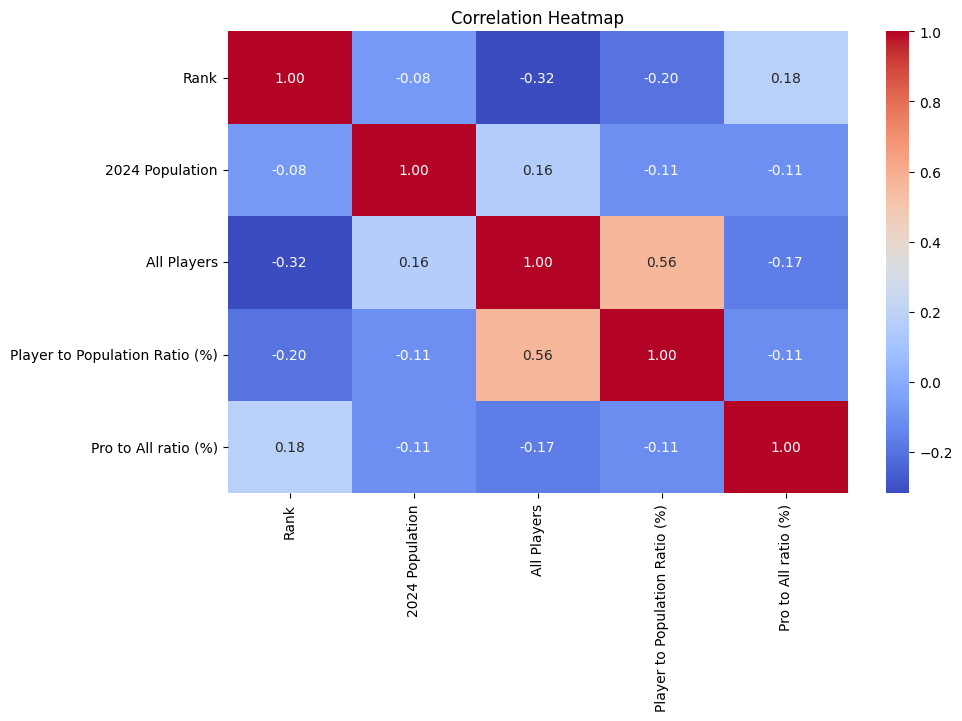

<Figure size 640x480 with 0 Axes>

In [155]:
#2. Statistical Analysis & Hypothesis Testing
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(FIFA_main[["Rank", "2024 Population", "All Players", "Player to Population Ratio (%)", "Pro to All ratio (%)"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Save as PNG
plt.savefig("my_plot", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


In [156]:
#Key Metrics to Check:
#Correlation between "All Players" & Rank (should be negative, meaning more players = better rank).
#Correlation between "Players to Population Ratio" & Rank (higher ratio should correlate with better rank).

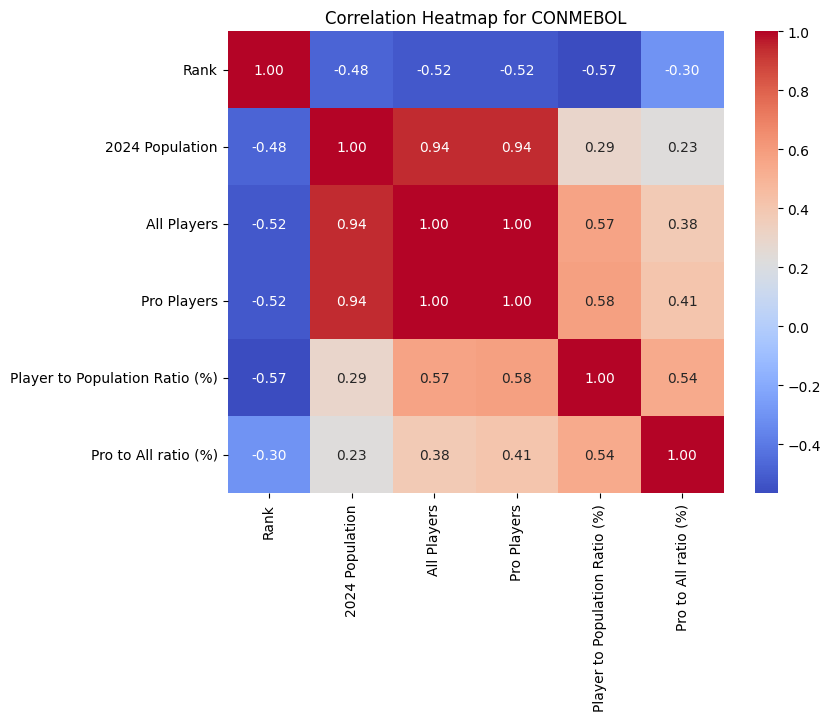

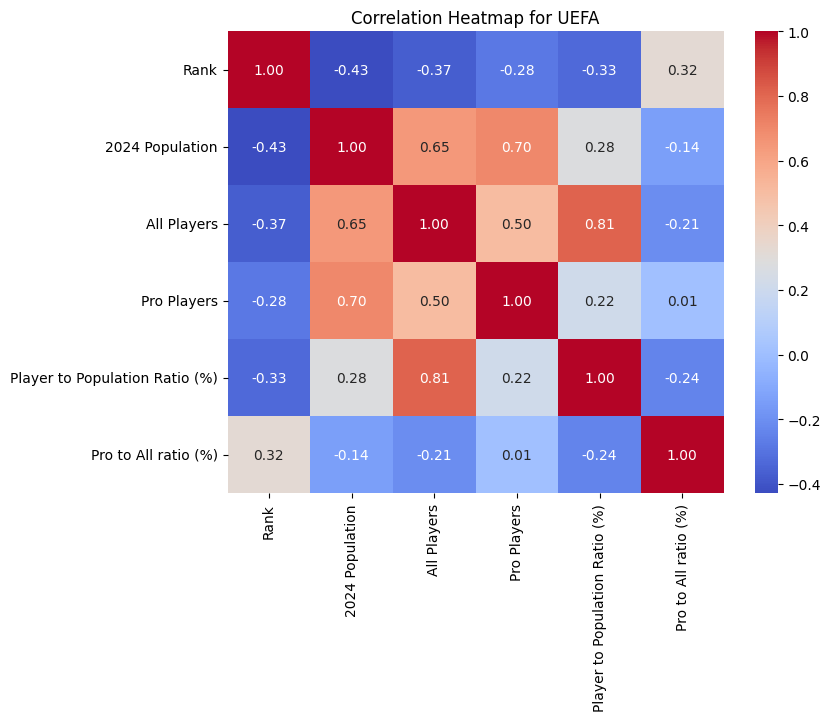

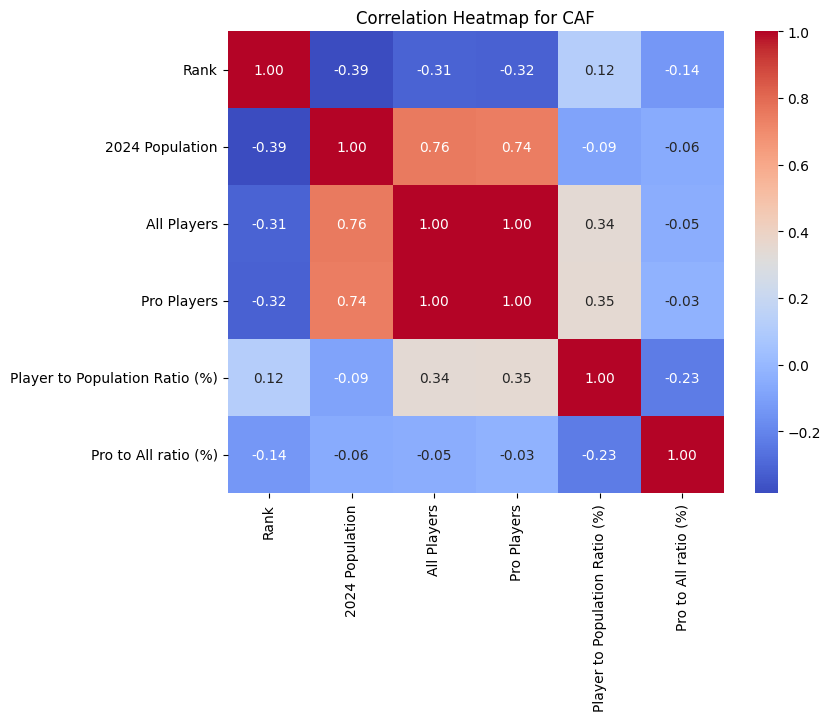

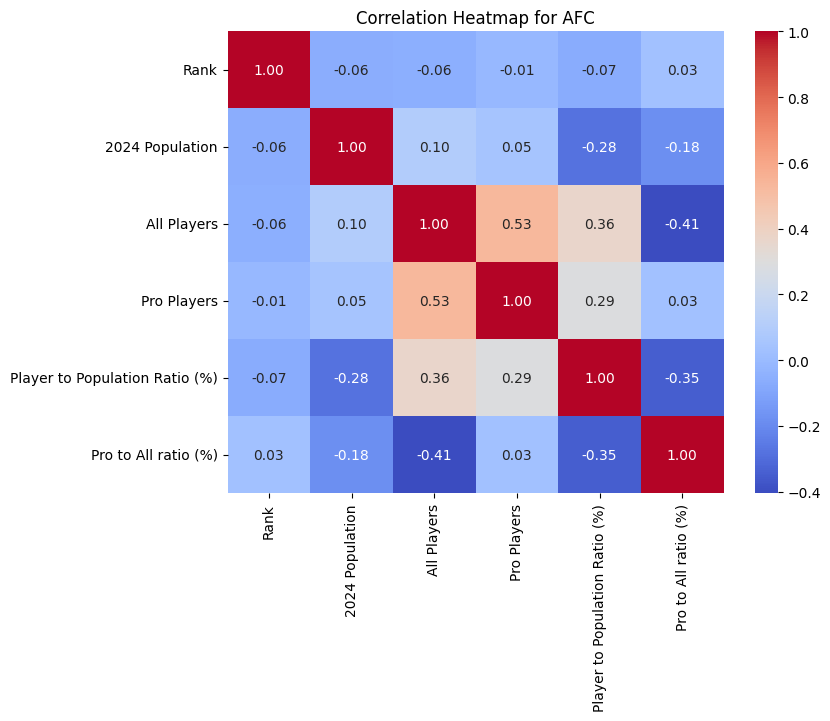

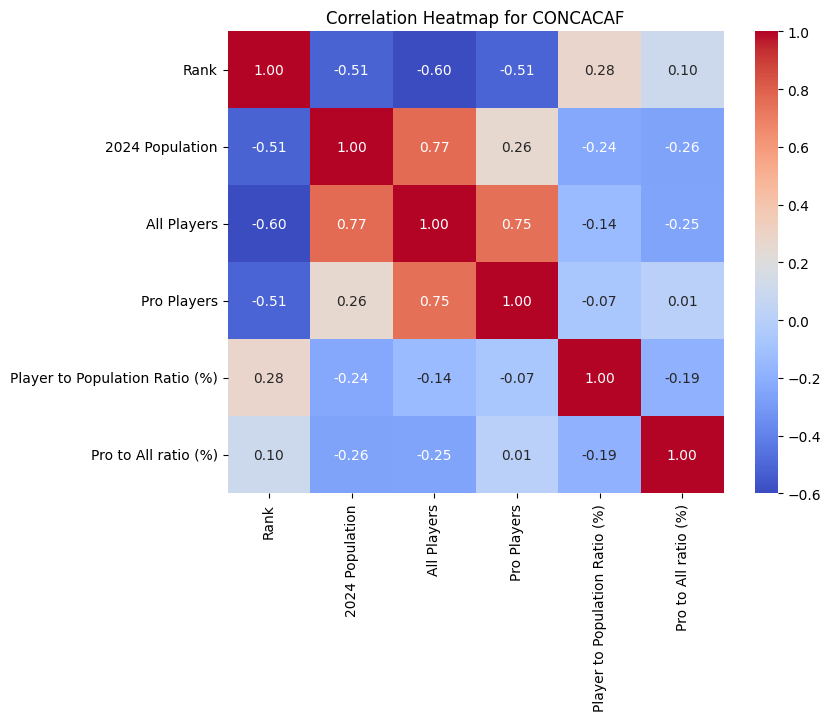

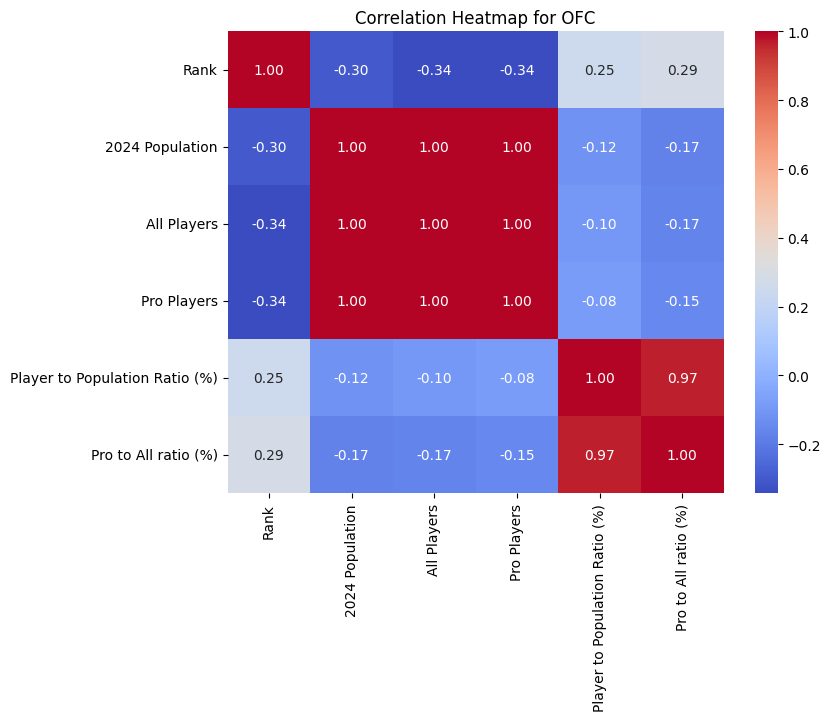

In [157]:
#correlation headhip for each confederation
# List of numerical columns to analyze
cols = ["Rank", "2024 Population", "All Players", "Pro Players", 
        "Player to Population Ratio (%)", "Pro to All ratio (%)"]

# Get unique confederations
confederations = FIFA_main["Confederation"].unique()

# Generate correlation heatmaps for each confederation
for conf in confederations:
    subset = FIFA_main[FIFA_main["Confederation"] == conf][cols]  # Filter data
    corr_matrix = subset.corr()  # Compute correlation matrix

    # Plot heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap for {conf}")
    plt.show()

In [158]:
#Hypothesis Testing (Spearman’s Rank Correlation)

from scipy.stats import spearmanr

# Spearman correlation between Rank & All Players
corr, p_value = spearmanr(FIFA_main["Rank"], FIFA_main["All Players"])
print(f"Spearman Correlation between Rank and All Players: {corr:.4f}, p-value: {p_value:.4f}")

Spearman Correlation between Rank and All Players: -0.5583, p-value: 0.0000


In [159]:
#Segmentation by Economic Zone & Confederation
# Grouping by Confederation
confederation_groups = FIFA_main.groupby("Confederation").agg({
    "Rank": "mean",
    "All Players": "mean",
    "Pro to All ratio (%)": "mean"
}).sort_values("Rank")

confederation_groups

,Rank,All Players,Pro to All ratio (%)
Confederation,,,
CONMEBOL,32.200000,1.999766e+06,1.270000
UEFA,70.425926,7.145683e+05,1.857407
CAF,107.566038,4.337989e+05,1.937736
AFC,124.652174,6.097847e+05,1.778261
CONCACAF,136.400000,8.472237e+04,2.060000
OFC,163.000000,4.102100e+04,2.645455


In [160]:
#Key Findings:
#Which economic zones have the strongest relationship between players & rank?
#Does a high Professional to All Players Ratio indicate success within the same confederation?

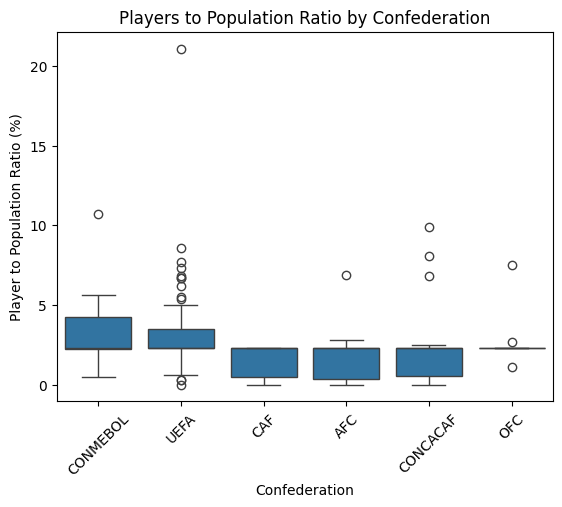

In [161]:
#to visualize above
sns.boxplot(x="Confederation", y="Player to Population Ratio (%)", data=FIFA_main)
plt.xticks(rotation=45)
plt.title("Players to Population Ratio by Confederation")
plt.show()

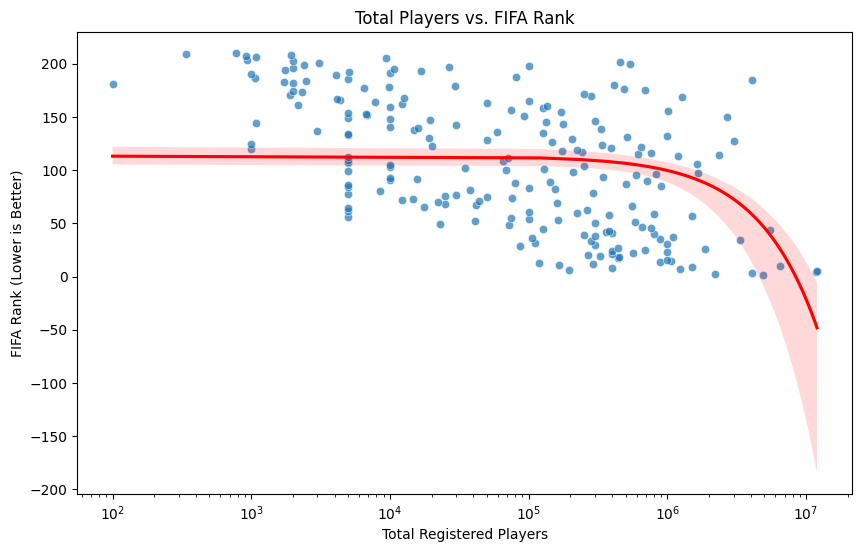

In [162]:
#1.Scatter Plot: All Players vs. Rank
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=FIFA_main["All Players"], y=FIFA_main["Rank"], alpha=0.7)
sns.regplot(x=FIFA_main["All Players"], y=FIFA_main["Rank"], scatter=False, color="red")

plt.title("Total Players vs. FIFA Rank")
plt.xlabel("Total Registered Players")
plt.ylabel("FIFA Rank (Lower is Better)")
plt.xscale("log")  # Log scale if values are skewed
plt.show()


In [163]:
# Insights:

#A negative correlation (downward trend) supports your hypothesis.
#If data is scattered with no trend, total players might not be a strong predictor.

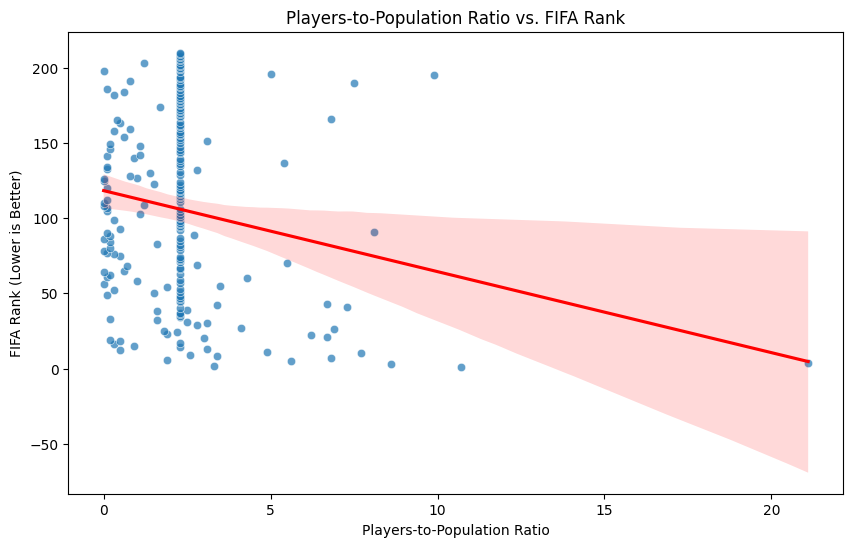

In [164]:
#2. Scatter Plot: Players-to-Population Ratio vs. Rank.\
#Goal: Test if countries with higher football participation rates perform better
plt.figure(figsize=(10,6))
sns.scatterplot(x=FIFA_main["Player to Population Ratio (%)"], y=FIFA_main["Rank"], alpha=0.7)
sns.regplot(x=FIFA_main["Player to Population Ratio (%)"], y=FIFA_main["Rank"], scatter=False, color="red")

plt.title("Players-to-Population Ratio vs. FIFA Rank")
plt.xlabel("Players-to-Population Ratio")
plt.ylabel("FIFA Rank (Lower is Better)")
plt.show()

In [165]:
#insights:

#If countries with higher ratios tend to have better ranks, it means football participation drives success.

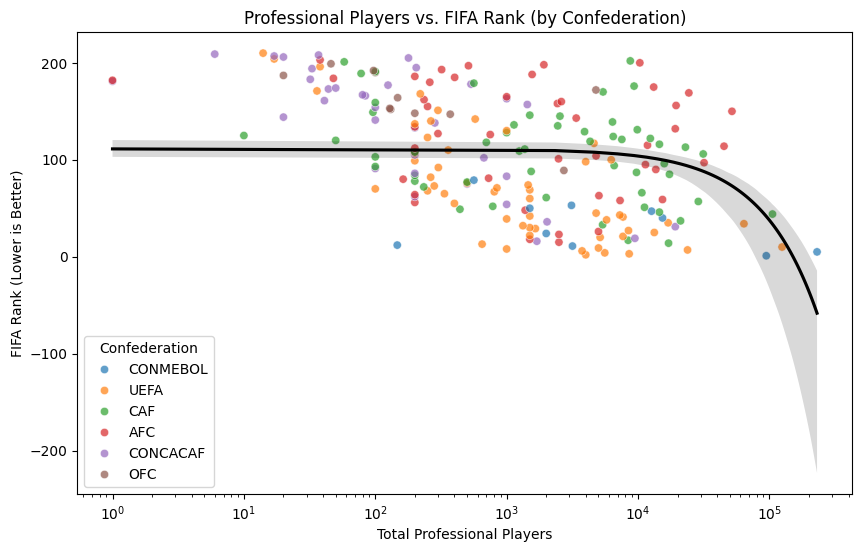

In [166]:
#3. Scatter Plot: Professional Players vs. Rank (Economic Zone Segmentation)
#GOAL: Check how economic factors influence the relationship between professional players and FIFA rank.
plt.figure(figsize=(10,6))
sns.scatterplot(x=FIFA_main["Pro Players"], y=FIFA_main["Rank"], hue=FIFA_main["Confederation"], alpha=0.7)
sns.regplot(x=FIFA_main["Pro Players"], y=FIFA_main["Rank"], scatter=False, color="black")

plt.title("Professional Players vs. FIFA Rank (by Confederation)")
plt.xlabel("Total Professional Players")
plt.ylabel("FIFA Rank (Lower is Better)")
plt.legend(title="Confederation")
plt.xscale("log")
plt.show()

In [167]:
# Insights:

#If richer zones (e.g., Europe) show a stronger relationship, it proves that economic context affects football success.
#If some confederations show stronger trends than others, it means success factors vary by region

In [170]:
#Modeling the Relationship
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (y)
X = FIFA_main[["All Players", "Player to Population Ratio (%)"]]
y = FIFA_main["Rank"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Display results
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:                        Rank   R-squared:                       0.102
Model:                                 OLS   Adj. R-squared:                  0.093
Method:                      Least Squares   F-statistic:                     11.70
Date:              Ceturtd., 13 marts 2025   Prob (F-statistic):           1.54e-05
Time:                             21:00:01   Log-Likelihood:                -1142.9
No. Observations:                      209   AIC:                             2292.
Df Residuals:                          206   BIC:                             2302.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [171]:
#✅ Significant Effect: The number of All Players has a strong negative effect on Rank (more players → better rank).
#❌ No Effect: Player-to-population ratio does not significantly impact Rank.
#⚠ Potential Issues:


In [172]:
# Compute correlation between "All Players" and "Rank"
correlation = FIFA_main["All Players"].corr(df["Rank"])
correlation

np.float64(-0.3173836998970388)